In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, Flatten, MaxPooling1D, GRU
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

### Acquiring and preparing stock price data for Tech Companies

In [2]:
#For Company Apple 

df_AAPL = pd.read_csv("AAPL.csv")#Reading the data file
print(df_AAPL.head())

print(df_AAPL.tail())

print(df_AAPL.shape)#dimension
print(df_AAPL.info())#information about columns
print(df_AAPL.isnull().sum())#columns with null values

         Date       Open       High        Low      Close  Adj Close  \
0  2016-10-05  28.350000  28.415001  28.172501  28.262501  26.505720   
1  2016-10-06  28.424999  28.584999  28.282499  28.472500  26.702660   
2  2016-10-07  28.577499  28.639999  28.377501  28.514999  26.742525   
3  2016-10-10  28.754999  29.187500  28.680000  29.012501  27.209099   
4  2016-10-11  29.424999  29.672501  29.049999  29.075001  27.267710   

      Volume  
0   85812400  
1  115117200  
2   97433600  
3  144944000  
4  256164000  
            Date        Open        High         Low       Close   Adj Close  \
1253  2021-09-28  143.250000  144.750000  141.690002  141.910004  141.910004   
1254  2021-09-29  142.470001  144.449997  142.029999  142.830002  142.830002   
1255  2021-09-30  143.660004  144.380005  141.279999  141.500000  141.500000   
1256  2021-10-01  141.899994  142.919998  139.110001  142.649994  142.649994   
1257  2021-10-04  141.759995  142.210007  138.270004  139.139999  139.139999 

In [3]:
#Assigning date as index

df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date'], format='%Y-%m')
df_AAPL = df_AAPL.set_index('Date')


In [4]:
print(df_AAPL.info())#information about columns
print(df_AAPL.describe(include='all'))#Summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-10-05 to 2021-10-04
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     68.310497    69.041348    67.588722    68.346194    67.183733   
std      36.963422    37.392843    36.460324    36.934008    37.423471   
min      26.642500    26.920000    26.020000    26.427500    24.912031   
25%      41.438125    42.035002    41.041249    41.451875    39.879433   
50%      51.017500    51.481251    50.610000    51.066250    49.933687   
75%      92.365625    93.732500    91.751877    92.787500    92.028589   
max     156.979996  

In [5]:
#For Company Google 

df_GOOG = pd.read_csv("GOOG.csv")#Reading the data file
print(df_GOOG.head())

print(df_GOOG.tail())

print(df_GOOG.shape)#dimension
print(df_GOOG.info())#information about columns
print(df_GOOG.isnull().sum())#columns with null values

         Date        Open        High         Low       Close   Adj Close  \
0  2016-10-05  779.309998  782.070007  775.650024  776.469971  776.469971   
1  2016-10-06  779.000000  780.479980  775.539978  776.859985  776.859985   
2  2016-10-07  779.659973  779.659973  770.750000  775.080017  775.080017   
3  2016-10-10  777.710022  789.380005  775.869995  785.940002  785.940002   
4  2016-10-11  786.659973  792.280029  780.580017  783.070007  783.070007   

    Volume  
0  1461200  
1  1070700  
2   933200  
3  1174900  
4  1372500  
            Date         Open         High          Low        Close  \
1253  2021-09-28  2781.770020  2792.129883  2714.000000  2723.679932   
1254  2021-09-29  2742.194092  2747.969971  2685.000000  2690.419922   
1255  2021-09-30  2686.500000  2711.800049  2660.000000  2665.310059   
1256  2021-10-01  2671.090088  2741.419922  2667.550049  2729.250000   
1257  2021-10-04  2713.989990  2714.000000  2623.330078  2675.300049   

        Adj Close   Volume

In [6]:
#Assigning date as index

df_GOOG['Date'] = pd.to_datetime(df_GOOG['Date'], format='%Y-%m')
df_GOOG = df_GOOG.set_index('Date')


In [7]:
print(df_GOOG.info())#information about columns
print(df_GOOG.describe(include='all'))#Summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-10-05 to 2021-10-04
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean   1338.837623  1351.929685  1326.783154  1339.962157  1339.962157   
std     509.761442   514.243823   506.054180   510.488262   510.488262   
min     744.590027   754.000000   727.539978   736.080017   736.080017   
25%    1029.119995  1043.044495  1017.562500  1030.270050  1030.270050   
50%    1170.354981  1178.645019  1158.554993  1169.364990  1169.364990   
75%    1474.292450  1490.000000  1464.067505  1480.047455  1480.047455   
max    2918.989990  

In [8]:
#For Company IBM 

df_IBM = pd.read_csv("IBM.csv")#Reading the data file
print(df_IBM.head())

print(df_IBM.tail())

print(df_IBM.shape)#dimension
print(df_IBM.info())#information about columns
print(df_IBM.isnull().sum())#columns with null values

         Date        Open        High         Low       Close   Adj Close  \
0  2016-10-05  150.162521  150.889099  149.827911  150.172089  119.900604   
1  2016-10-06  149.942642  150.506699  149.034424  149.980881  119.747948   
2  2016-10-07  150.229446  150.764816  148.049713  148.824097  118.824341   
3  2016-10-10  149.818359  151.520081  149.770554  150.114716  119.854782   
4  2016-10-11  149.837479  150.047806  147.122375  147.982788  118.152596   

    Volume  
0  1761987  
1  2039805  
2  2794807  
3  2595440  
4  3034760  
            Date        Open        High         Low       Close   Adj Close  \
1253  2021-09-28  133.049713  133.546844  131.175903  131.424469  131.424469   
1254  2021-09-29  131.673035  133.776291  130.439774  133.059280  133.059280   
1255  2021-09-30  133.843216  134.388138  132.409180  132.820267  132.820267   
1256  2021-10-01  134.799240  137.638626  134.196945  137.017212  137.017212   
1257  2021-10-04  136.462708  139.579346  136.089859  137.7

In [9]:
#Assigning date as index

df_IBM['Date'] = pd.to_datetime(df_IBM['Date'], format='%Y-%m')
df_IBM = df_IBM.set_index('Date')

In [10]:
print(df_IBM.info())#information about columns
print(df_IBM.describe(include='all'))#Summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-10-05 to 2021-10-04
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None
              Open         High          Low        Close    Adj Close  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    134.753417   135.801000   133.676828   134.726082   119.447059   
std      14.990814    14.808571    15.137358    14.970356     9.977033   
min      90.439774    93.441681    86.577438    90.602295    83.924698   
25%     123.867115   124.792066   122.201244   123.386713   113.934776   
50%     135.482796   136.481842   134.392921   135.305931   118.828403   
75%     144.443115   145.688339   143.506214   144.490917   125.090436   
max     173.996170  

### Data Exploration

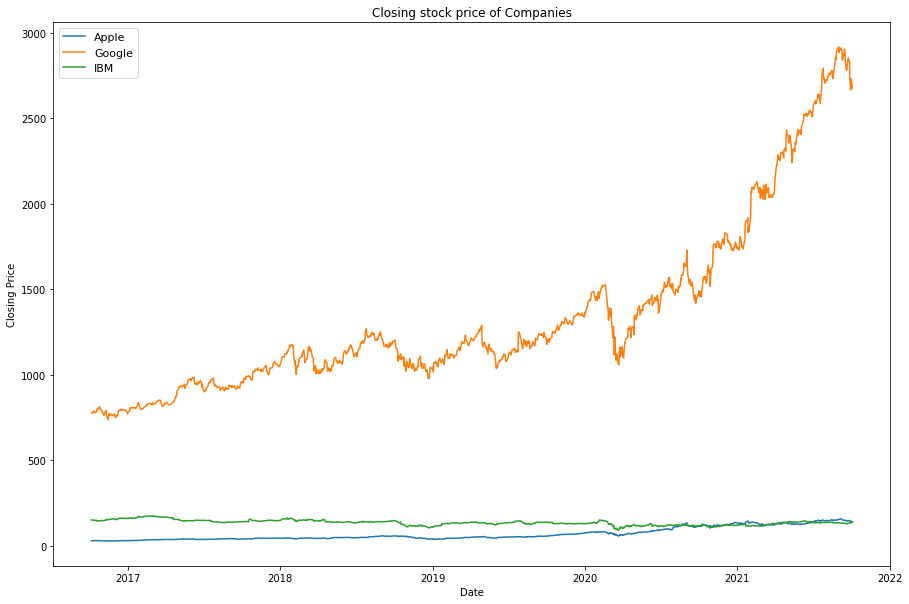

In [11]:
#plotting closing stock price of all companies
plt.figure(figsize=(15,10))
plt.title("Closing stock price of Companies")
plt.plot(df_AAPL['Close'], label ="Apple")
plt.plot(df_GOOG['Close'], label ="Google")
plt.plot(df_IBM['Close'], label ="IBM")
plt.ylabel("Closing Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.savefig('closeprice.png')
plt.show()

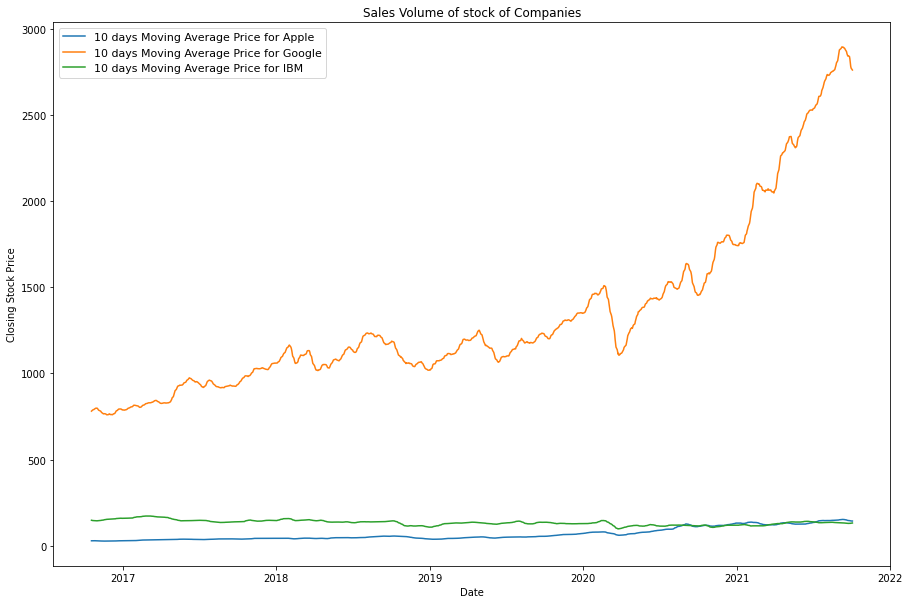

In [12]:
# Creating rolling average for closing price plots for the companies

plt.figure(figsize=(15,10))
plt.title("Sales Volume of stock of Companies")
plt.plot(df_AAPL['Close'].rolling(10).mean(), label ="10 days Moving Average Price for Apple")
plt.plot(df_GOOG['Close'].rolling(10).mean(), label ="10 days Moving Average Price for Google")
plt.plot(df_IBM['Close'].rolling(10).mean(), label ="10 days Moving Average Price for IBM")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.savefig('rollingprice.png')
plt.show()

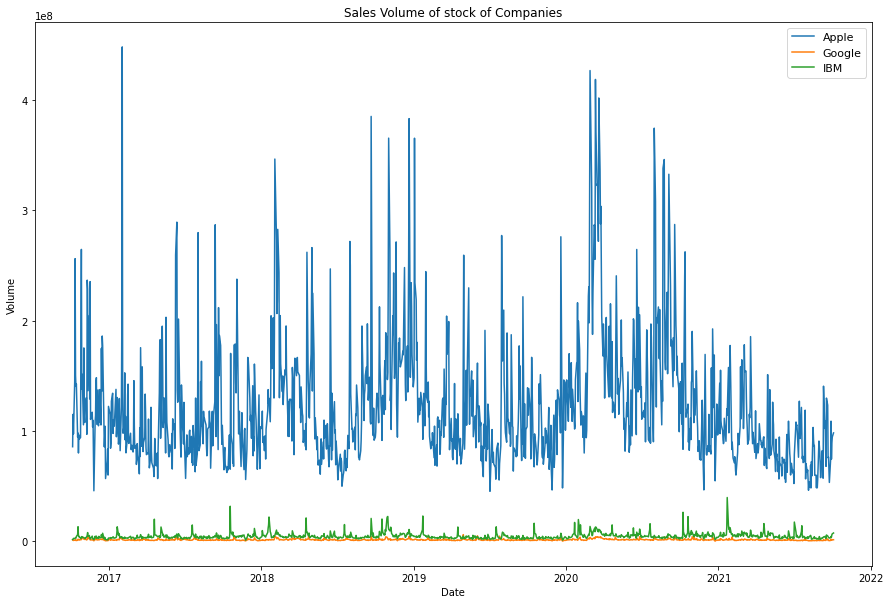

In [13]:
#plotting volume of stock traded of all companies

plt.figure(figsize=(15,10))
plt.title("Sales Volume of stock of Companies")
plt.plot(df_AAPL['Volume'], label ="Apple")
plt.plot(df_GOOG['Volume'], label ="Google")
plt.plot(df_IBM['Volume'], label ="IBM")
plt.ylabel("Volume")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

In [14]:
#Creating dataframe of closing price of all companies

df = pd.DataFrame()
df['Close_Apple']=df_AAPL['Close']
df['Close_Google']=df_GOOG['Close']
df['Close_IBM']=df_IBM['Close']
df

,Close_Apple,Close_Google,Close_IBM
Date,,,
2016-10-05,28.262501,776.469971,150.172089
2016-10-06,28.472500,776.859985,149.980881
2016-10-07,28.514999,775.080017,148.824097
2016-10-10,29.012501,785.940002,150.114716
2016-10-11,29.075001,783.070007,147.982788
...,...,...,...
2021-09-28,141.910004,2723.679932,131.424469
2021-09-29,142.830002,2690.419922,133.059280
2021-09-30,141.500000,2665.310059,132.820267


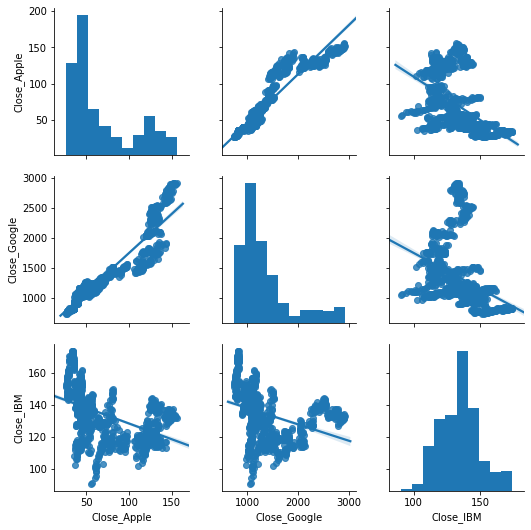

In [15]:
#Pairplot containing the closing price of all companies

sns.pairplot(df, kind='reg')

[Text(0.5, 1.0, 'Correlation of closing prices')]

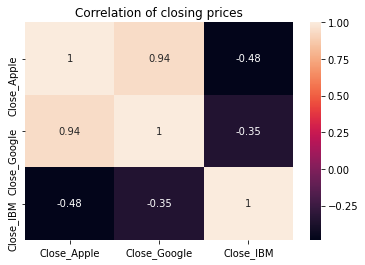

In [16]:
#Heatmap of all closing prices

sns.heatmap(df.corr(), annot=True).set(title ='Correlation of closing prices')

## Closing Stock Price Forecasting for Apple

### Data Splitting

In [17]:
#Removing volume as this column will not be used for model training

cols = list(df_AAPL)[0:5]
df_AAPL_new = df_AAPL[cols]
df_AAPL_new

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.505720
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.702660
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.742525
2016-10-10,28.754999,29.187500,28.680000,29.012501,27.209099
2016-10-11,29.424999,29.672501,29.049999,29.075001,27.267710
...,...,...,...,...,...
2021-09-28,143.250000,144.750000,141.690002,141.910004,141.910004
2021-09-29,142.470001,144.449997,142.029999,142.830002,142.830002
2021-09-30,143.660004,144.380005,141.279999,141.500000,141.500000


In [18]:
#Splitting the data into train, validation and test set

x = len(df_AAPL_new)
train_df_AAPL = df_AAPL_new[0:int(x*0.7)]
val_df_AAPL = df_AAPL_new[int(x*0.7):int(x*0.9)]
test_df_AAPL = df_AAPL_new[int(x*0.9):]

print(train_df_AAPL.shape)
print(val_df_AAPL.shape)
print(test_df_AAPL.shape)

(880, 5)
(252, 5)
(126, 5)


### Data Preprocessing

In [19]:
#Standardising the datasets

scaling = StandardScaler()
scaling.fit(train_df_AAPL)
train_df_AAPL_scaled = scaling.transform(train_df_AAPL)
val_df_AAPL_scaled = scaling.transform(val_df_AAPL)
test_df_AAPL_scaled = scaling.transform(test_df_AAPL)

print("Scaled train data")
print(train_df_AAPL_scaled)
print("Scaled Validation data")
print(val_df_AAPL_scaled)
print("Scaled Test data")
print(test_df_AAPL_scaled)

Scaled train data
[[-1.51947054 -1.5253564  -1.51947359 -1.52446074 -1.51771595]
 [-1.51316676 -1.51131983 -1.51010747 -1.5068866  -1.50157885]
 [-1.50034889 -1.50677853 -1.50201823 -1.50332999 -1.49831235]
 ...
 [ 1.27734697  1.26258751  1.17205703  1.15058776  1.19184217]
 [ 1.1479074   1.18889447  1.12458672  1.23469274  1.27329651]
 [ 1.19959931  1.2002478   1.16865102  1.16104861  1.20197297]]
Scaled Validation data
[[1.36980358 1.55962934 1.39024897 1.60165952 1.62869905]
 [1.78796028 1.73694696 1.59503    1.53805739 1.56710087]
 [1.61859636 1.64756563 1.6425003  1.6769778  1.70164359]
 ...
 [6.49148929 6.38186865 6.51147961 6.40381721 6.35680263]
 [6.50914005 6.5453557  6.56086566 6.6465091  6.59366926]
 [6.73019554 6.6254471  6.78054786 6.67245175 6.61898896]]
Scaled Test data
[[6.67388113 6.69067674 6.73712209 6.81388269 6.75702442]
 [6.93612175 6.89462237 7.024923   7.01975213 6.95795204]
 [7.00756613 7.11342986 7.10581342 7.24068519 7.17358119]
 [7.23618661 7.09774282 7.2045

In [20]:
# Preparing features and target using sliding window method

def data_prepare(data, n_steps, future_n):
    X_data = []
    Y_data = []
    for i in range(n_steps, len(data) - future_n +1):
        X_data.append(data[i - n_steps:i, 0:data.shape[1]])
        Y_data.append(data[i + future_n - 1:i + future_n,3])#extracting output variable for close price

    X_data, Y_data = np.array(X_data), np.array(Y_data)
    return X_data, Y_data

In [21]:
# reshape into X=d,d+1,d+2,d+3....t+14 and Y=d+14+1
n_steps = 10  # Number of past days to be used to predict the future
future_n = 5 # Predict price after 1 day into the future

X_train_AAPL, y_train_AAPL = data_prepare(train_df_AAPL_scaled, n_steps, future_n)
X_val_AAPL, y_val_AAPL = data_prepare(val_df_AAPL_scaled, n_steps, future_n)
X_test_AAPL, y_test_AAPL = data_prepare(test_df_AAPL_scaled, n_steps, future_n)

In [22]:
print('X_train_AAPL shape == {}.'.format(X_train_AAPL.shape))
print('y_train_AAPL shape == {}.'.format(y_train_AAPL.shape))

print('X_val_AAPL shape == {}.'.format(X_val_AAPL.shape))
print('y_val_AAPL shape == {}.'.format(y_val_AAPL.shape))

print('X_test_AAPL shape == {}.'.format(X_test_AAPL.shape))
print('y_test_AAPL shape == {}.'.format(y_test_AAPL.shape))

X_train_AAPL shape == (866, 10, 5).
y_train_AAPL shape == (866, 1).
X_val_AAPL shape == (238, 10, 5).
y_val_AAPL shape == (238, 1).
X_test_AAPL shape == (112, 10, 5).
y_test_AAPL shape == (112, 1).


### LSTM Model Development

In [23]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_AAPL.shape[1], X_train_AAPL.shape[2])))

# Adding 2nd LSTM layer
model.add(LSTM(units=32, activation='relu', return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            17920     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


### Model Hyperparameter Tuning

In [24]:
#Model Training with adam optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 4s 63ms/step - loss: 0.5959 - val_loss: 711.4376

Epoch 00001: val_loss improved from inf to 711.43762, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.2057 - val_loss: 8.4104

Epoch 00002: val_loss improved from 711.43762 to 8.41037, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 20ms/step - loss: 0.1002 - val_loss: 3.7736

Epoch 00003: val_loss improved from 8.41037 to 3.77363, saving model to weights.h5
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0970 - val_loss: 1.3705

Epoch 00004: val_loss improved from 3.77363 to 1.37046, saving model to weights.h5
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0807 - val_loss: 0.6386

Epoch 00005: val_loss improved from 1.37046 to 0.63865, saving model to weights.h5
Epoch 6/100
14/14 [==============================] - 0s 14ms/step - loss: 0.06

14/14 [==============================] - 0s 17ms/step - loss: 0.0529 - val_loss: 4.8296

Epoch 00051: val_loss did not improve from 0.63865
Epoch 52/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0486 - val_loss: 4.7985

Epoch 00052: val_loss did not improve from 0.63865
Epoch 53/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0485 - val_loss: 4.7817

Epoch 00053: val_loss did not improve from 0.63865
Epoch 54/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0490 - val_loss: 4.7644

Epoch 00054: val_loss did not improve from 0.63865
Epoch 55/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0517 - val_loss: 4.7684

Epoch 00055: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00055: val_loss did not improve from 0.63865
Epoch 56/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0462 - val_loss: 4.7659

Epoch 00056: val_loss did not improve from 0.63865
Epoch 57/100
14/14 [==========

In [25]:
#Model Training with SGD optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='SGD', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 3s 76ms/step - loss: 0.0456 - val_loss: 4.7910

Epoch 00001: val_loss improved from inf to 4.79102, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0512 - val_loss: 4.6924

Epoch 00002: val_loss improved from 4.79102 to 4.69238, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0489 - val_loss: 3.9556

Epoch 00003: val_loss improved from 4.69238 to 3.95562, saving model to weights.h5
Epoch 4/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0548 - val_loss: 2.9667

Epoch 00004: val_loss improved from 3.95562 to 2.96670, saving model to weights.h5
Epoch 5/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0522 - val_loss: 2.8635

Epoch 00005: val_loss improved from 2.96670 to 2.86354, saving model to weights.h5
Epoch 6/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0502 - v

14/14 [==============================] - 0s 19ms/step - loss: 0.0476 - val_loss: 4.0419

Epoch 00051: val_loss did not improve from 2.86354
Epoch 52/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0484 - val_loss: 4.0413

Epoch 00052: val_loss did not improve from 2.86354
Epoch 53/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0493 - val_loss: 4.0396

Epoch 00053: val_loss did not improve from 2.86354
Epoch 54/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0519 - val_loss: 4.0400

Epoch 00054: val_loss did not improve from 2.86354
Epoch 55/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0419 - val_loss: 4.0392

Epoch 00055: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-06.

Epoch 00055: val_loss did not improve from 2.86354
Epoch 56/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0534 - val_loss: 4.0388

Epoch 00056: val_loss did not improve from 2.86354
Epoch 57/100
1

In [26]:
#Model Training with RMSprop optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 3s 53ms/step - loss: 0.0643 - val_loss: 0.9410

Epoch 00001: val_loss improved from inf to 0.94102, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0615 - val_loss: 4.7030

Epoch 00002: val_loss did not improve from 0.94102
Epoch 3/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0548 - val_loss: 0.3491

Epoch 00003: val_loss improved from 0.94102 to 0.34908, saving model to weights.h5
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0673 - val_loss: 3.1362

Epoch 00004: val_loss did not improve from 0.34908
Epoch 5/100
14/14 [==============================] - 0s 19ms/step - loss: 0.0571 - val_loss: 2.6021

Epoch 00005: val_loss did not improve from 0.34908
Epoch 6/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0529 - val_loss: 2.5127

Epoch 00006: val_loss did not improve from 0.34908
Epoch 7/100
14/14 [=========

14/14 [==============================] - 0s 13ms/step - loss: 0.0472 - val_loss: 6.5158

Epoch 00052: val_loss did not improve from 0.34908
Epoch 53/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0429 - val_loss: 6.5371

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00053: val_loss did not improve from 0.34908
Epoch 54/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0466 - val_loss: 6.5435

Epoch 00054: val_loss did not improve from 0.34908
Epoch 55/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0518 - val_loss: 6.5355

Epoch 00055: val_loss did not improve from 0.34908
Epoch 56/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0447 - val_loss: 6.5371

Epoch 00056: val_loss did not improve from 0.34908
Epoch 57/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0426 - val_loss: 6.5406

Epoch 00057: val_loss did not improve from 0.34908
Epoch 58/100
14/14 [==========

### Model training on entire training dataset with best parameters obtained for Company Apple

In [27]:
#Combining train and validation dataset

X_train_final_AAPL = np.concatenate((X_train_AAPL, X_val_AAPL), axis=0)
print(X_train_final_AAPL.shape)

y_train_final_AAPL = np.concatenate((y_train_AAPL, y_val_AAPL), axis=0)
print(y_train_final_AAPL.shape)

(1104, 10, 5)
(1104, 1)


In [28]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_final_AAPL,y_train_final_AAPL,validation_data=(X_test_AAPL,y_test_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
18/18 [==============================] - 4s 58ms/step - loss: 0.4707 - val_loss: 0.2053

Epoch 00001: val_loss improved from inf to 0.20527, saving model to weights_new.h5
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2994 - val_loss: 0.2877

Epoch 00002: val_loss did not improve from 0.20527
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 0.2769 - val_loss: 0.8593

Epoch 00003: val_loss did not improve from 0.20527
Epoch 4/100
18/18 [==============================] - 0s 24ms/step - loss: 0.2640 - val_loss: 0.3468

Epoch 00004: val_loss did not improve from 0.20527
Epoch 5/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2739 - val_loss: 0.5334

Epoch 00005: val_loss did not improve from 0.20527
Epoch 6/100
18/18 [==============================] - 0s 20ms/step - loss: 0.2530 - val_loss: 0.6284

Epoch 00006: val_loss did not improve from 0.20527
Epoch 7/100
18/18 [==============================] - 0s 

18/18 [==============================] - 1s 32ms/step - loss: 0.2028 - val_loss: 0.4815

Epoch 00052: val_loss did not improve from 0.17136
Epoch 53/100
18/18 [==============================] - 0s 27ms/step - loss: 0.1921 - val_loss: 0.4561

Epoch 00053: val_loss did not improve from 0.17136
Epoch 54/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2174 - val_loss: 0.4287

Epoch 00054: val_loss did not improve from 0.17136
Epoch 55/100
18/18 [==============================] - 0s 18ms/step - loss: 0.1941 - val_loss: 0.4218

Epoch 00055: val_loss did not improve from 0.17136
Epoch 56/100
18/18 [==============================] - 0s 22ms/step - loss: 0.1994 - val_loss: 0.4576

Epoch 00056: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00056: val_loss did not improve from 0.17136
Epoch 57/100
18/18 [==============================] - 0s 16ms/step - loss: 0.2195 - val_loss: 0.4578

Epoch 00057: val_loss did not improve from 0.17136
Epoch 58/100


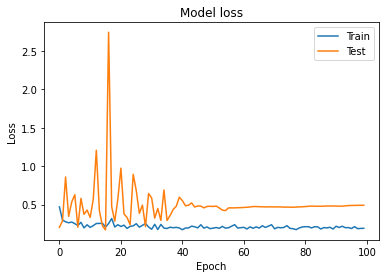

In [29]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [30]:
### Calculate RMSE performance metrics for train data
import math
from sklearn.metrics import mean_squared_error

predict_train=model.predict(X_train_final_AAPL)
math.sqrt(mean_squared_error(y_train_final_AAPL,predict_train))

0.2497122548659478

In [31]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_AAPL)
math.sqrt(mean_squared_error(y_test_AAPL,predict_test))

0.7011729241132645

In [32]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_AAPL.shape[1], axis=-1)
y_train_final_AAPL_copies = np.repeat(y_train_final_AAPL, train_df_AAPL.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_AAPL.shape[1], axis=-1)
y_test_AAPL_copies = np.repeat(y_test_AAPL, train_df_AAPL.shape[1], axis=-1)

In [33]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
train_Y = scaling.inverse_transform(y_train_final_AAPL_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]
test_Y = scaling.inverse_transform(y_test_AAPL_copies)[:,0]

RMSE_AAPL_TRAIN_LSTM = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_AAPL_TRAIN_LSTM)

RMSE_AAPL_TEST_LSTM = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_AAPL_TEST_LSTM)

RMSE for train data
2.9709392795828506
RMSE for test data
8.342167480672876


In [34]:
#Mean absolute percentage error on test data

MAPE_AAPL_TEST_LSTM = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_AAPL_TEST_LSTM)

4.92883214362387


### Comparing actual and predicted stock price

In [35]:
# Assigning index to predicted test data

Predict_AAPL = pd.DataFrame(index=test_df_AAPL[14:].index)#since historical time steps are 10 and prediction in future is 5 so 10+5-1 = 14
Predict_AAPL['Predictions'] = test_Predict

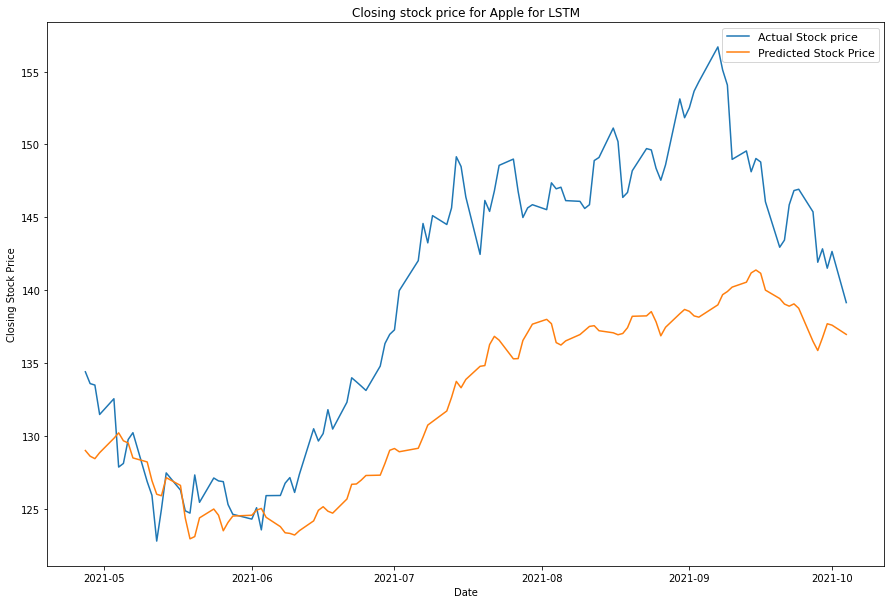

In [36]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for LSTM")
plt.plot(test_df_AAPL[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

In [37]:
#Combining original training and validation data

train_total = pd.concat([train_df_AAPL,val_df_AAPL])
train_total

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-10-05,28.350000,28.415001,28.172501,28.262501,26.505720
2016-10-06,28.424999,28.584999,28.282499,28.472500,26.702660
2016-10-07,28.577499,28.639999,28.377501,28.514999,26.742525
2016-10-10,28.754999,29.187500,28.680000,29.012501,27.209099
2016-10-11,29.424999,29.672501,29.049999,29.075001,27.267710
...,...,...,...,...,...
2021-03-30,120.110001,120.400002,118.860001,119.900002,119.517616
2021-03-31,121.650002,123.519997,121.150002,122.150002,121.760445
2021-04-01,123.660004,124.180000,122.489998,123.000000,122.607727


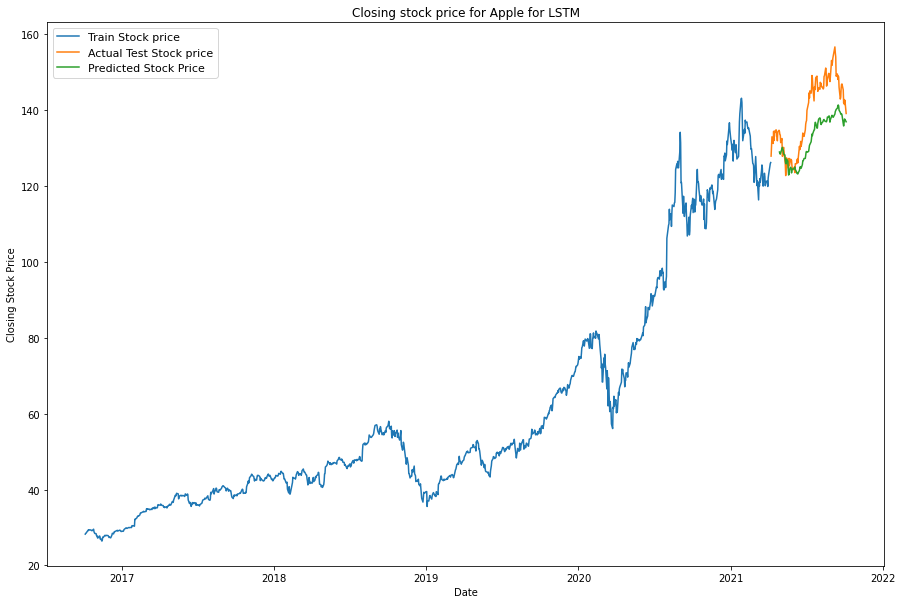

In [38]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for LSTM")
plt.plot(train_total['Close'], label ="Train Stock price")
plt.plot(test_df_AAPL['Close'], label ="Actual Test Stock price")
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### GRU Model Development

In [39]:
# Initializing the Neural Network based on GRU model
model = Sequential()

# 1st GRU layer
model.add(GRU(units=64, activation='relu',return_sequences=True, input_shape=(X_train_AAPL.shape[1], X_train_AAPL.shape[2])))

# 2nd GRU layer
model.add(GRU(units=32, activation='relu', return_sequences=False))

# Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 64)            13632     
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 23,073
Trainable params: 23,073
Non-trainable params: 0
_________________________________________________________________


### Model Hyperparameter Tuning

In [40]:
#Model Training with adam optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 3s 38ms/step - loss: 0.3581 - val_loss: 5.5848

Epoch 00001: val_loss improved from inf to 5.58477, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0977 - val_loss: 0.2079

Epoch 00002: val_loss improved from 5.58477 to 0.20795, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0819 - val_loss: 1.3268

Epoch 00003: val_loss did not improve from 0.20795
Epoch 4/100
14/14 [==============================] - 0s 25ms/step - loss: 0.0575 - val_loss: 0.7649

Epoch 00004: val_loss did not improve from 0.20795
Epoch 5/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0620 - val_loss: 0.6650

Epoch 00005: val_loss did not improve from 0.20795
Epoch 6/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0555 - val_loss: 0.5915

Epoch 00006: val_loss did not improve from 0.20795
Epoch 7/100
14/14 [=========

14/14 [==============================] - 0s 25ms/step - loss: 0.0559 - val_loss: 1.4084

Epoch 00052: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00052: val_loss did not improve from 0.20795
Epoch 53/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0446 - val_loss: 1.4100

Epoch 00053: val_loss did not improve from 0.20795
Epoch 54/100
14/14 [==============================] - 0s 15ms/step - loss: 0.0460 - val_loss: 1.4089

Epoch 00054: val_loss did not improve from 0.20795
Epoch 55/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0513 - val_loss: 1.4061

Epoch 00055: val_loss did not improve from 0.20795
Epoch 56/100
14/14 [==============================] - 0s 30ms/step - loss: 0.0459 - val_loss: 1.4032

Epoch 00056: val_loss did not improve from 0.20795
Epoch 57/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0435 - val_loss: 1.3998

Epoch 00057: val_loss did not improve from 0.20795
Epoch 58/100
14/14 [==========

In [41]:
#Model Training with SGD optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='SGD', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 5s 54ms/step - loss: 0.0486 - val_loss: 1.5278

Epoch 00001: val_loss improved from inf to 1.52780, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 29ms/step - loss: 0.0529 - val_loss: 1.0842

Epoch 00002: val_loss improved from 1.52780 to 1.08417, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0451 - val_loss: 1.4085

Epoch 00003: val_loss did not improve from 1.08417
Epoch 4/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0495 - val_loss: 1.6347

Epoch 00004: val_loss did not improve from 1.08417
Epoch 5/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0600 - val_loss: 1.3135

Epoch 00005: val_loss did not improve from 1.08417
Epoch 6/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0471 - val_loss: 1.4452

Epoch 00006: val_loss did not improve from 1.08417
Epoch 7/100
14/14 [=========

14/14 [==============================] - 0s 20ms/step - loss: 0.0475 - val_loss: 1.1913

Epoch 00052: val_loss did not improve from 1.05803
Epoch 53/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0371 - val_loss: 1.1929

Epoch 00053: val_loss did not improve from 1.05803
Epoch 54/100
14/14 [==============================] - 0s 20ms/step - loss: 0.0495 - val_loss: 1.1953

Epoch 00054: val_loss did not improve from 1.05803
Epoch 55/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0479 - val_loss: 1.1935

Epoch 00055: val_loss did not improve from 1.05803
Epoch 56/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0490 - val_loss: 1.1900

Epoch 00056: ReduceLROnPlateau reducing learning rate to 1.599999814061448e-05.

Epoch 00056: val_loss did not improve from 1.05803
Epoch 57/100
14/14 [==============================] - 0s 16ms/step - loss: 0.0486 - val_loss: 1.1904

Epoch 00057: val_loss did not improve from 1.05803
Epoch 58/100
1

In [42]:
#Model Training with RMSprop optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 4s 61ms/step - loss: 0.0581 - val_loss: 1.4049

Epoch 00001: val_loss improved from inf to 1.40488, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0461 - val_loss: 2.2081

Epoch 00002: val_loss did not improve from 1.40488
Epoch 3/100
14/14 [==============================] - 0s 27ms/step - loss: 0.0435 - val_loss: 3.5104

Epoch 00003: val_loss did not improve from 1.40488
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 0.0576 - val_loss: 1.2382

Epoch 00004: val_loss improved from 1.40488 to 1.23821, saving model to weights.h5
Epoch 5/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0554 - val_loss: 2.2412

Epoch 00005: val_loss did not improve from 1.23821
Epoch 6/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0487 - val_loss: 1.6419

Epoch 00006: val_loss did not improve from 1.23821
Epoch 7/100
14/14 [=========

14/14 [==============================] - 0s 28ms/step - loss: 0.0442 - val_loss: 1.4058

Epoch 00052: val_loss did not improve from 0.39835
Epoch 53/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0456 - val_loss: 1.3807

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00053: val_loss did not improve from 0.39835
Epoch 54/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0449 - val_loss: 1.3799

Epoch 00054: val_loss did not improve from 0.39835
Epoch 55/100
14/14 [==============================] - 1s 51ms/step - loss: 0.0423 - val_loss: 1.3777

Epoch 00055: val_loss did not improve from 0.39835
Epoch 56/100
14/14 [==============================] - 0s 23ms/step - loss: 0.0418 - val_loss: 1.3704

Epoch 00056: val_loss did not improve from 0.39835
Epoch 57/100
14/14 [==============================] - 0s 24ms/step - loss: 0.0418 - val_loss: 1.3694

Epoch 00057: val_loss did not improve from 0.39835
Epoch 58/100


### Model training on entire training dataset with best parameters

In [43]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_final_AAPL,y_train_final_AAPL,validation_data=(X_test_AAPL,y_test_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
18/18 [==============================] - 8s 44ms/step - loss: 0.3306 - val_loss: 0.3294

Epoch 00001: val_loss improved from inf to 0.32945, saving model to weights_new.h5
Epoch 2/100
18/18 [==============================] - 0s 18ms/step - loss: 0.2471 - val_loss: 0.3491

Epoch 00002: val_loss did not improve from 0.32945
Epoch 3/100
18/18 [==============================] - 0s 20ms/step - loss: 0.2844 - val_loss: 0.1585

Epoch 00003: val_loss improved from 0.32945 to 0.15853, saving model to weights_new.h5
Epoch 4/100
18/18 [==============================] - 0s 22ms/step - loss: 0.2894 - val_loss: 0.2144

Epoch 00004: val_loss did not improve from 0.15853
Epoch 5/100
18/18 [==============================] - 0s 24ms/step - loss: 0.2732 - val_loss: 0.3044

Epoch 00005: val_loss did not improve from 0.15853
Epoch 6/100
18/18 [==============================] - 0s 20ms/step - loss: 0.2580 - val_loss: 0.5330

Epoch 00006: val_loss did not improve from 0.15853
Epoch 7/100
18/18 [=

18/18 [==============================] - 0s 18ms/step - loss: 0.2191 - val_loss: 0.2187

Epoch 00052: val_loss did not improve from 0.14200
Epoch 53/100
18/18 [==============================] - 0s 15ms/step - loss: 0.2681 - val_loss: 0.2185

Epoch 00053: val_loss did not improve from 0.14200
Epoch 54/100
18/18 [==============================] - 0s 19ms/step - loss: 0.2473 - val_loss: 0.2195

Epoch 00054: val_loss did not improve from 0.14200
Epoch 55/100
18/18 [==============================] - 0s 21ms/step - loss: 0.2100 - val_loss: 0.2184

Epoch 00055: val_loss did not improve from 0.14200
Epoch 56/100
18/18 [==============================] - 0s 14ms/step - loss: 0.2468 - val_loss: 0.2184

Epoch 00056: val_loss did not improve from 0.14200
Epoch 57/100
18/18 [==============================] - 0s 14ms/step - loss: 0.2588 - val_loss: 0.2178

Epoch 00057: val_loss did not improve from 0.14200
Epoch 58/100
18/18 [==============================] - 0s 19ms/step - loss: 0.2249 - val_loss: 0

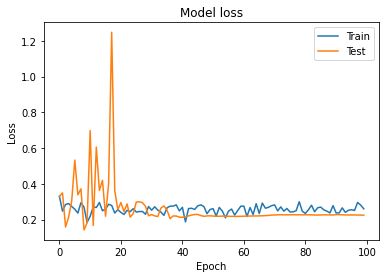

In [44]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [45]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_final_AAPL)
math.sqrt(mean_squared_error(y_train_final_AAPL,predict_train))

0.25014104640807944

In [46]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_AAPL)
math.sqrt(mean_squared_error(y_test_AAPL,predict_test))

0.4740473592967609

In [47]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_AAPL.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_AAPL.shape[1], axis=-1)

In [48]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_AAPL_TRAIN_GRU = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_AAPL_TRAIN_GRU)

RMSE_AAPL_TEST_GRU = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_AAPL_TEST_GRU)

RMSE for train data
2.9760410708791327
RMSE for test data
5.639953672494874


In [49]:
#Mean absolute percentage error on test data

MAPE_AAPL_TEST_GRU = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_AAPL_TEST_GRU)

3.309791381185631


### Comparing actual and predicted stock price

In [50]:
# Assigning index to predicted test data

Predict_AAPL['Predictions'] = test_Predict
Predict_AAPL

,Predictions
Date,
2021-04-27,130.092270
2021-04-28,129.532410
2021-04-29,129.062149
2021-04-30,130.245651
2021-05-03,130.987045
...,...
2021-09-28,138.421585
2021-09-29,140.003876
2021-09-30,141.111893


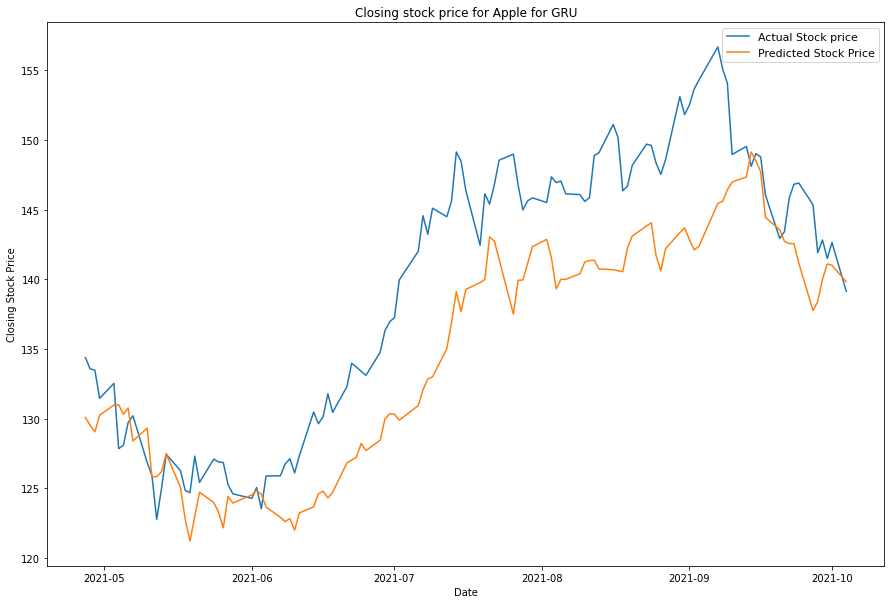

In [51]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for GRU")
plt.plot(test_df_AAPL[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

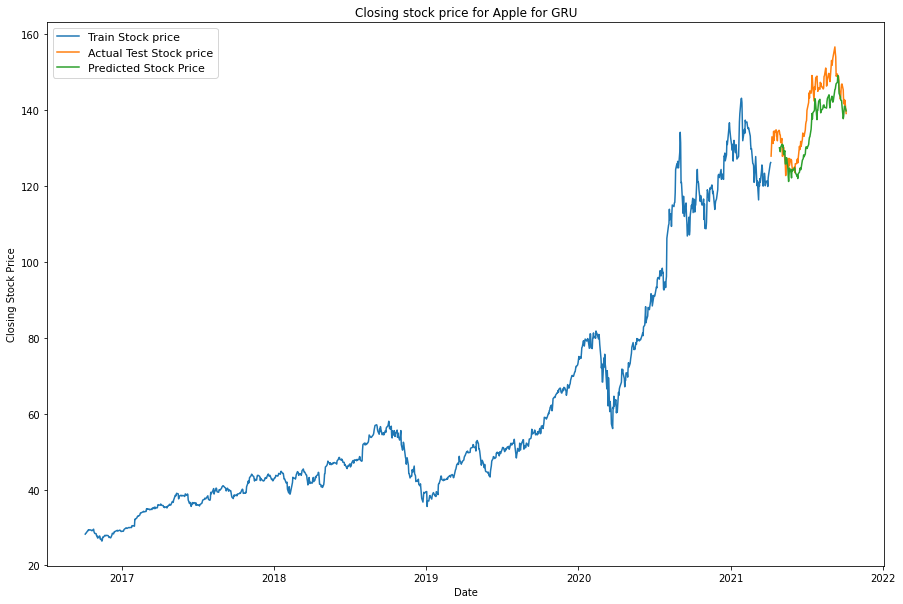

In [52]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for GRU")
plt.plot(train_total['Close'], label ="Train Stock price")
plt.plot(test_df_AAPL['Close'], label ="Actual Test Stock price")
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### CNN Model Development

In [53]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_AAPL.shape[1], X_train_AAPL.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9, 64)             704       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 13,605
Trainable params: 13,605
Non-trainable params: 0
_________________________________________________________________


### Model Hyperparameter Tuning

In [54]:
#Model Training with adam optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 1s 23ms/step - loss: 0.2579 - val_loss: 2.2561

Epoch 00001: val_loss improved from inf to 2.25607, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0695 - val_loss: 0.3536

Epoch 00002: val_loss improved from 2.25607 to 0.35363, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.0506 - val_loss: 0.2955

Epoch 00003: val_loss improved from 0.35363 to 0.29545, saving model to weights.h5
Epoch 4/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0443 - val_loss: 1.0074

Epoch 00004: val_loss did not improve from 0.29545
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.5917

Epoch 00005: val_loss did not improve from 0.29545
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0437 - val_loss: 0.5996

Epoch 00006: val_loss did not improve from 0.29545


14/14 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.3136

Epoch 00052: val_loss did not improve from 0.26028
Epoch 53/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0285 - val_loss: 0.3148

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00053: val_loss did not improve from 0.26028
Epoch 54/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.3152

Epoch 00054: val_loss did not improve from 0.26028
Epoch 55/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.3141

Epoch 00055: val_loss did not improve from 0.26028
Epoch 56/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0285 - val_loss: 0.3147

Epoch 00056: val_loss did not improve from 0.26028
Epoch 57/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0285 - val_loss: 0.3151

Epoch 00057: val_loss did not improve from 0.26028
Epoch 58/100
14/14

In [55]:
#Model Training with SGD optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='SGD', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 1s 19ms/step - loss: 0.0299 - val_loss: 0.6431

Epoch 00001: val_loss improved from inf to 0.64307, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.2994

Epoch 00002: val_loss improved from 0.64307 to 0.29943, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.2739

Epoch 00003: val_loss improved from 0.29943 to 0.27387, saving model to weights.h5
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0291 - val_loss: 0.2591

Epoch 00004: val_loss improved from 0.27387 to 0.25915, saving model to weights.h5
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0306 - val_loss: 0.3306

Epoch 00005: val_loss did not improve from 0.25915
Epoch 6/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0298 - val_loss: 0.3315

Epoch 00006: val_lo

14/14 [==============================] - 0s 9ms/step - loss: 0.0283 - val_loss: 0.3159

Epoch 00052: val_loss did not improve from 0.25915
Epoch 53/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0283 - val_loss: 0.3161

Epoch 00053: val_loss did not improve from 0.25915
Epoch 54/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0283 - val_loss: 0.3161

Epoch 00054: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-06.

Epoch 00054: val_loss did not improve from 0.25915
Epoch 55/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0283 - val_loss: 0.3161

Epoch 00055: val_loss did not improve from 0.25915
Epoch 56/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.3161

Epoch 00056: val_loss did not improve from 0.25915
Epoch 57/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0283 - val_loss: 0.3161

Epoch 00057: val_loss did not improve from 0.25915
Epoch 58/100
14/14

In [56]:
#Model Training with RMSprop optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, save_weights_only=True, verbose= 1)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_AAPL,y_train_AAPL,validation_data=(X_val_AAPL,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 1s 11ms/step - loss: 0.0679 - val_loss: 0.2657

Epoch 00001: val_loss improved from inf to 0.26570, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.4274

Epoch 00002: val_loss did not improve from 0.26570
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.3200

Epoch 00003: val_loss did not improve from 0.26570
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.3692

Epoch 00004: val_loss did not improve from 0.26570
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0433 - val_loss: 0.4325

Epoch 00005: val_loss did not improve from 0.26570
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.3260

Epoch 00006: val_loss did not improve from 0.26570
Epoch 7/100
14/14 [==============================] - 0s 8ms/step

14/14 [==============================] - 0s 9ms/step - loss: 0.0256 - val_loss: 0.3306

Epoch 00052: val_loss did not improve from 0.24995
Epoch 53/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0256 - val_loss: 0.3302

Epoch 00053: val_loss did not improve from 0.24995
Epoch 54/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 0.3303

Epoch 00054: val_loss did not improve from 0.24995
Epoch 55/100
14/14 [==============================] - 0s 14ms/step - loss: 0.0256 - val_loss: 0.3310

Epoch 00055: val_loss did not improve from 0.24995
Epoch 56/100
14/14 [==============================] - 0s 17ms/step - loss: 0.0256 - val_loss: 0.3306

Epoch 00056: val_loss did not improve from 0.24995
Epoch 57/100
14/14 [==============================] - 0s 10ms/step - loss: 0.0256 - val_loss: 0.3304

Epoch 00057: val_loss did not improve from 0.24995
Epoch 58/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0256 - val_loss: 0.3

### Model training on entire training dataset with best parameters

In [57]:
#Model Training with RMSprop optimizer on entire training data as with RMSprop optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_final_AAPL,y_train_final_AAPL,validation_data=(X_test_AAPL,y_test_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.1896 - val_loss: 0.4278

Epoch 00001: val_loss improved from inf to 0.42777, saving model to weights_new.h5
Epoch 2/100
18/18 [==============================] - 0s 8ms/step - loss: 0.1148 - val_loss: 1.2444

Epoch 00002: val_loss did not improve from 0.42777
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 0.1519

Epoch 00003: val_loss improved from 0.42777 to 0.15189, saving model to weights_new.h5
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1170 - val_loss: 0.3061

Epoch 00004: val_loss did not improve from 0.15189
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1190 - val_loss: 0.3779

Epoch 00005: val_loss did not improve from 0.15189
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.1189 - val_loss: 0.8852

Epoch 00006: val_loss did not improve from 0.15189
Epoch 7/100
18/18 [======

18/18 [==============================] - 0s 6ms/step - loss: 0.0661 - val_loss: 0.1253

Epoch 00052: val_loss did not improve from 0.12523
Epoch 53/100
18/18 [==============================] - 0s 7ms/step - loss: 0.0666 - val_loss: 0.1249

Epoch 00053: val_loss improved from 0.12523 to 0.12488, saving model to weights_new.h5
Epoch 54/100
18/18 [==============================] - 0s 16ms/step - loss: 0.0661 - val_loss: 0.1319

Epoch 00054: val_loss did not improve from 0.12488
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0669 - val_loss: 0.1248

Epoch 00055: val_loss improved from 0.12488 to 0.12484, saving model to weights_new.h5
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 0.0662 - val_loss: 0.1242

Epoch 00056: val_loss improved from 0.12484 to 0.12416, saving model to weights_new.h5
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 0.0665 - val_loss: 0.1253

Epoch 00057: val_loss did not improve from 

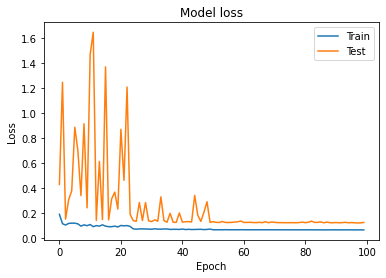

In [58]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [59]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_final_AAPL)
math.sqrt(mean_squared_error(y_train_final_AAPL,predict_train))

0.2555550837266326

In [60]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_AAPL)
math.sqrt(mean_squared_error(y_test_AAPL,predict_test))

0.35272055977544536

In [61]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_AAPL.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_AAPL.shape[1], axis=-1)

In [62]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_AAPL_TRAIN_CNN = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_AAPL_TRAIN_CNN)

RMSE_AAPL_TEST_CNN = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_AAPL_TEST_CNN)

RMSE for train data
3.0404542838564903
RMSE for test data
4.196476068191866


In [63]:
#Mean absolute percentage error on test data

MAPE_AAPL_TEST_CNN = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_AAPL_TEST_CNN)

2.424344854880087


### Comparing actual and predicted stock price

In [64]:
# Assigning index to predicted test data

Predict_AAPL['Predictions'] = test_Predict
Predict_AAPL

,Predictions
Date,
2021-04-27,134.038910
2021-04-28,134.521957
2021-04-29,133.727646
2021-04-30,133.439301
2021-05-03,134.380676
...,...
2021-09-28,146.090576
2021-09-29,145.506546
2021-09-30,146.441605


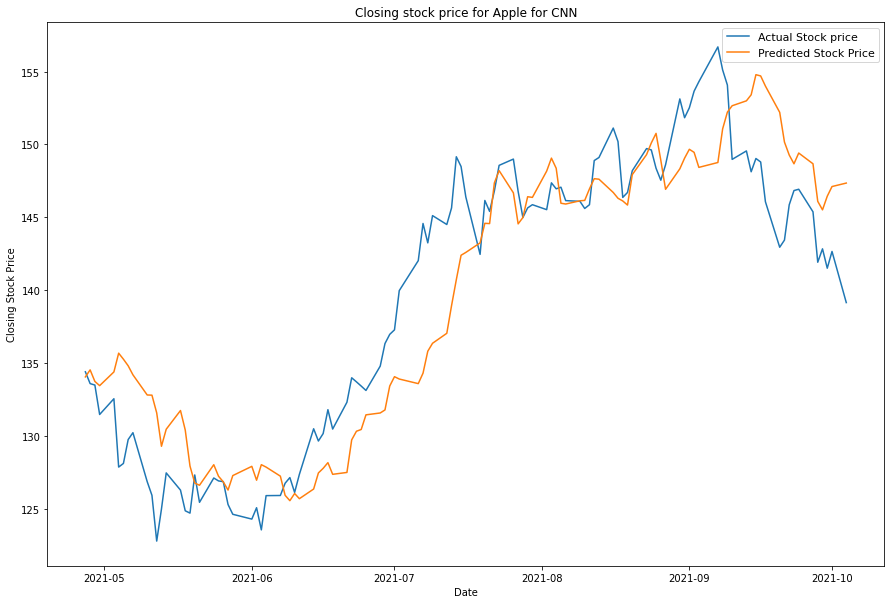

In [65]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for CNN")
plt.plot(test_df_AAPL[14:]['Close'], label ="Actual Stock price")#Plotting after 14 days to match index with predicted data
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

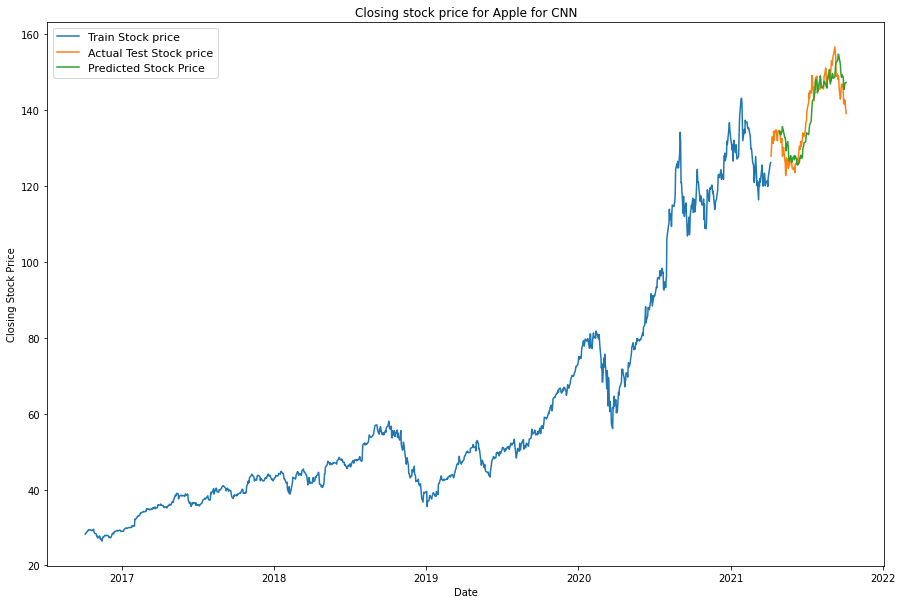

In [66]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for CNN")
plt.plot(train_total['Close'], label ="Train Stock price")
plt.plot(test_df_AAPL['Close'], label ="Actual Test Stock price")
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### MLP Model Development

In [67]:
# flatten input dimensions of train data to pass into the MLP model  
ninput = X_train_AAPL.shape[1] * X_train_AAPL.shape[2]
X_train_AAPL_new = X_train_AAPL.reshape((X_train_AAPL.shape[0], ninput))

print("Old shape")
print(X_train_AAPL.shape)

print("New shape")
print(X_train_AAPL_new.shape)

Old shape
(866, 10, 5)
New shape
(866, 50)


In [68]:
# flatten validation data input dimensions
ninputval = X_val_AAPL.shape[1] * X_val_AAPL.shape[2]
X_val_AAPL_new = X_val_AAPL.reshape((X_val_AAPL.shape[0], ninputval))

# print dimensions
print("Old shape")
print(X_val_AAPL.shape)

print("New shape")
print(X_val_AAPL_new.shape)

Old shape
(238, 10, 5)
New shape
(238, 50)


In [69]:
#Setup MLP Model

model = Sequential()
model.add(Dense(units = 128, activation='relu', input_dim=ninput))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='linear'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               6528      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


In [70]:
#Model Training with adam optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, verbose= 1,save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_AAPL_new,y_train_AAPL,validation_data=(X_val_AAPL_new,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 1s 12ms/step - loss: 0.2981 - val_loss: 1.8089

Epoch 00001: val_loss improved from inf to 1.80887, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.1429 - val_loss: 0.3346

Epoch 00002: val_loss improved from 1.80887 to 0.33458, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1077 - val_loss: 0.3477

Epoch 00003: val_loss did not improve from 0.33458
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1104 - val_loss: 0.5308

Epoch 00004: val_loss did not improve from 0.33458
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0753 - val_loss: 1.2748

Epoch 00005: val_loss did not improve from 0.33458
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0752 - val_loss: 0.6072

Epoch 00006: val_loss did not improve from 0.33458
Epoch 7/100
14/14 [=============

14/14 [==============================] - 0s 5ms/step - loss: 0.0448 - val_loss: 0.5846

Epoch 00052: val_loss did not improve from 0.26577
Epoch 53/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0427 - val_loss: 0.5909

Epoch 00053: val_loss did not improve from 0.26577
Epoch 54/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0422 - val_loss: 0.5859

Epoch 00054: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00054: val_loss did not improve from 0.26577
Epoch 55/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.5867

Epoch 00055: val_loss did not improve from 0.26577
Epoch 56/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.5894

Epoch 00056: val_loss did not improve from 0.26577
Epoch 57/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.5924

Epoch 00057: val_loss did not improve from 0.26577
Epoch 58/100
14/14 

In [71]:
#Model Training with SGD optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, verbose= 1,save_weights_only=True)

model.compile(optimizer='SGD', loss='mean_squared_error')

history = model.fit(X_train_AAPL_new,y_train_AAPL,validation_data=(X_val_AAPL_new,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 1s 22ms/step - loss: 0.0441 - val_loss: 0.7260

Epoch 00001: val_loss improved from inf to 0.72601, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0424 - val_loss: 0.4605

Epoch 00002: val_loss improved from 0.72601 to 0.46051, saving model to weights.h5
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.0400 - val_loss: 0.5149

Epoch 00003: val_loss did not improve from 0.46051
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.7141

Epoch 00004: val_loss did not improve from 0.46051
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.5464

Epoch 00005: val_loss did not improve from 0.46051
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.4786

Epoch 00006: val_loss did not improve from 0.46051
Epoch 7/100
14/14 [=============

14/14 [==============================] - 0s 6ms/step - loss: 0.0412 - val_loss: 0.6027

Epoch 00052: val_loss did not improve from 0.41643
Epoch 53/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.6019

Epoch 00053: val_loss did not improve from 0.41643
Epoch 54/100
14/14 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.6018

Epoch 00054: val_loss did not improve from 0.41643
Epoch 55/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.6014

Epoch 00055: val_loss did not improve from 0.41643
Epoch 56/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.6017

Epoch 00056: val_loss did not improve from 0.41643
Epoch 57/100
14/14 [==============================] - 0s 9ms/step - loss: 0.0386 - val_loss: 0.6020

Epoch 00057: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-06.

Epoch 00057: val_loss did not improve from 0.41643
Epoch 58/100
14/14 [

In [72]:
#Model Training with RMSprop optimizer

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights.h5', monitor= 'val_loss', mode= 'min', save_best_only=True, verbose= 1,save_weights_only=True)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_AAPL_new,y_train_AAPL,validation_data=(X_val_AAPL_new,y_val_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
14/14 [==============================] - 2s 10ms/step - loss: 0.0948 - val_loss: 0.2340

Epoch 00001: val_loss improved from inf to 0.23403, saving model to weights.h5
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 2.3435

Epoch 00002: val_loss did not improve from 0.23403
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0575 - val_loss: 0.5049

Epoch 00003: val_loss did not improve from 0.23403
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.5790

Epoch 00004: val_loss did not improve from 0.23403
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0534 - val_loss: 1.2174

Epoch 00005: val_loss did not improve from 0.23403
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 0.4588

Epoch 00006: val_loss did not improve from 0.23403
Epoch 7/100
14/14 [==============================] - 0s 5ms/step 

14/14 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.5978

Epoch 00052: val_loss did not improve from 0.23403
Epoch 53/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.5991

Epoch 00053: val_loss did not improve from 0.23403
Epoch 54/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.6055

Epoch 00054: val_loss did not improve from 0.23403
Epoch 55/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0400 - val_loss: 0.6057

Epoch 00055: val_loss did not improve from 0.23403
Epoch 56/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.6028

Epoch 00056: val_loss did not improve from 0.23403
Epoch 57/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.6024

Epoch 00057: val_loss did not improve from 0.23403
Epoch 58/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0366 - val_loss: 0.6014



### Model Training on entire training dataset with best parameters

In [73]:
# flatten input of entire training set
n_input_final_new = X_train_final_AAPL.shape[1] * X_train_final_AAPL.shape[2]
X_train_final_new_AAPL = X_train_final_AAPL.reshape((X_train_final_AAPL.shape[0], n_input_final_new))

# print dimensions
print(X_train_final_new_AAPL.shape)

(1104, 50)


In [74]:
# flatten input of test set
n_input_test = X_test_AAPL.shape[1] * X_test_AAPL.shape[2]
X_test_AAPL_new = X_test_AAPL.reshape((X_test_AAPL.shape[0], n_input_test))

# print dimensions
print(X_test_AAPL_new.shape)

(112, 50)


In [75]:
#Model Training with adam optimizer on entire training data as with adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_final_new_AAPL,y_train_final_AAPL,validation_data=(X_test_AAPL_new,y_test_AAPL),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
18/18 [==============================] - 1s 8ms/step - loss: 0.2596 - val_loss: 0.7147

Epoch 00001: val_loss improved from inf to 0.71474, saving model to weights_new.h5
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2497 - val_loss: 0.6996

Epoch 00002: val_loss improved from 0.71474 to 0.69960, saving model to weights_new.h5
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.2131 - val_loss: 2.1000

Epoch 00003: val_loss did not improve from 0.69960
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.2400 - val_loss: 0.2967

Epoch 00004: val_loss improved from 0.69960 to 0.29670, saving model to weights_new.h5
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2216 - val_loss: 0.2769

Epoch 00005: val_loss improved from 0.29670 to 0.27693, saving model to weights_new.h5
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 0.2376 - val_loss: 0.7353

Epoch

18/18 [==============================] - 0s 2ms/step - loss: 0.2102 - val_loss: 0.6380

Epoch 00052: val_loss did not improve from 0.25266
Epoch 53/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1723 - val_loss: 0.6557

Epoch 00053: val_loss did not improve from 0.25266
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1773 - val_loss: 0.6466

Epoch 00054: val_loss did not improve from 0.25266
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1641 - val_loss: 0.6124

Epoch 00055: val_loss did not improve from 0.25266
Epoch 56/100
18/18 [==============================] - 0s 2ms/step - loss: 0.2138 - val_loss: 0.5964

Epoch 00056: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00056: val_loss did not improve from 0.25266
Epoch 57/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1946 - val_loss: 0.6053

Epoch 00057: val_loss did not improve from 0.25266
Epoch 58/100
18/18 

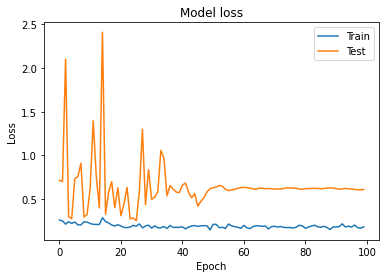

In [76]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [77]:
### Calculate RMSE performance metrics for train data
predict_train=model.predict(X_train_final_new_AAPL)
math.sqrt(mean_squared_error(y_train_final_AAPL,predict_train))


0.3603512351283351

In [78]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_AAPL_new)
math.sqrt(mean_squared_error(y_test_AAPL,predict_test))

0.7806358522831879

In [79]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_AAPL.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_AAPL.shape[1], axis=-1)

In [80]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_AAPL_TRAIN_MLP = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_AAPL_TRAIN_MLP)

RMSE_AAPL_TEST_MLP = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_AAPL_TEST_MLP)

RMSE for train data
4.2872611065764845
RMSE for test data
9.287575613315749


In [81]:
#Mean absolute percentage error on test data

MAPE_AAPL_TEST_MLP = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_AAPL_TEST_MLP)

6.061587703605312


### Comparing actual and predicted stock price

In [82]:
# Asigning predicted values to dataframe

Predict_AAPL['Predictions'] = test_Predict
Predict_AAPL

,Predictions
Date,
2021-04-27,126.680061
2021-04-28,125.383118
2021-04-29,125.471031
2021-04-30,125.384666
2021-05-03,126.418961
...,...
2021-09-28,134.724762
2021-09-29,135.696732
2021-09-30,136.296127


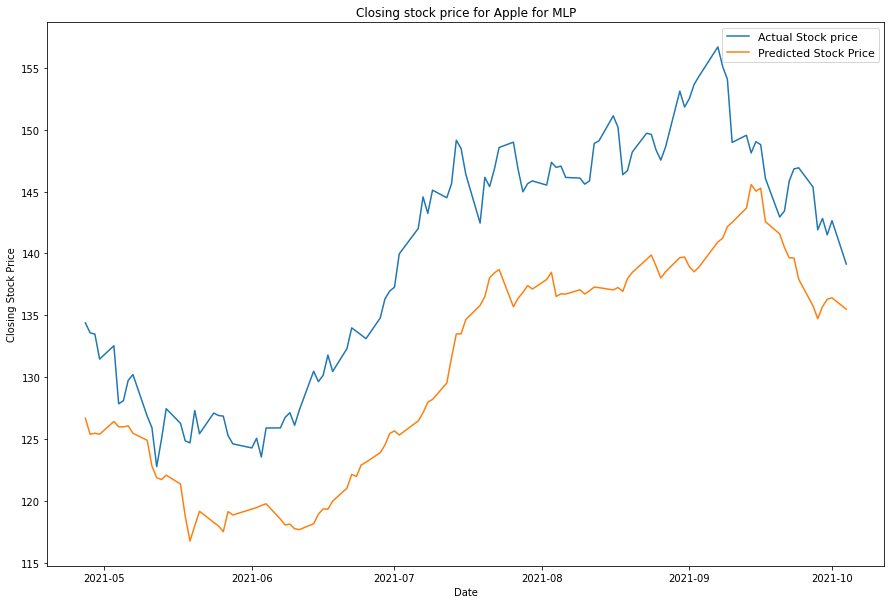

In [83]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for MLP")
plt.plot(test_df_AAPL[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

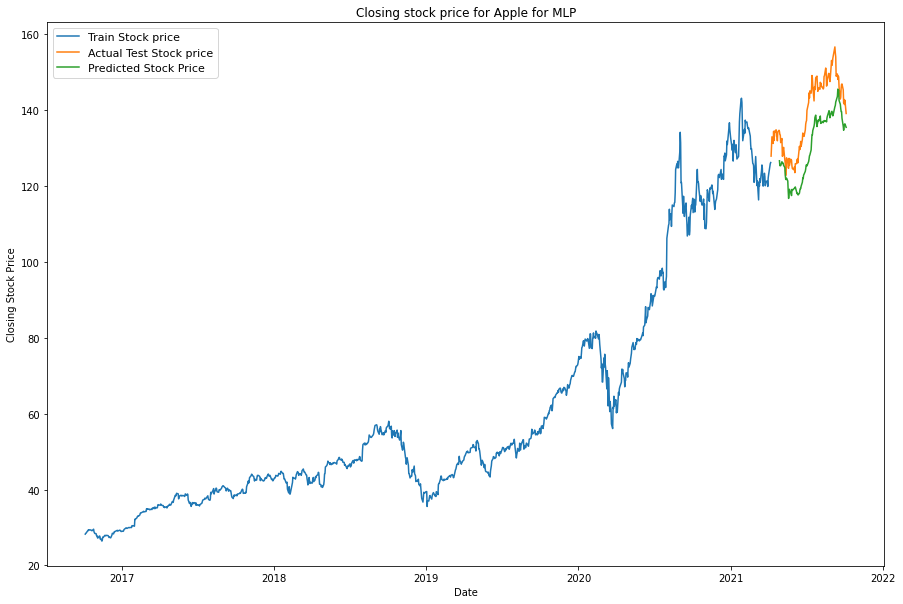

In [84]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Apple for MLP")
plt.plot(train_total['Close'], label ="Train Stock price")
plt.plot(test_df_AAPL['Close'], label ="Actual Test Stock price")
plt.plot(Predict_AAPL['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

  Model      RMSE      MAPE
0  LSTM  8.342167  4.928832
1   GRU  5.639954  3.309791
2   CNN  4.196476  2.424345
3   MLP  9.287576  6.061588


<Figure size 864x720 with 0 Axes>

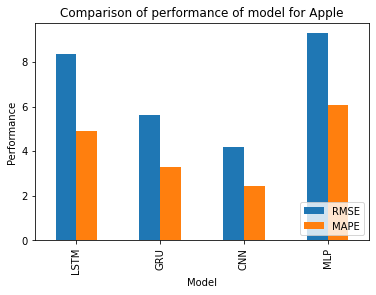

In [85]:
#Comparing the models performance with graphical visualisations

data = [['LSTM', RMSE_AAPL_TEST_LSTM, MAPE_AAPL_TEST_LSTM], ['GRU', RMSE_AAPL_TEST_GRU, MAPE_AAPL_TEST_GRU],\
       ['CNN', RMSE_AAPL_TEST_CNN, MAPE_AAPL_TEST_CNN], ['MLP', RMSE_AAPL_TEST_MLP, MAPE_AAPL_TEST_MLP]]
df_model = pd.DataFrame(data, columns = ['Model', 'RMSE', 'MAPE'])
print(df_model)

plt.figure(figsize=(12,10))
df_model.plot( kind='bar',x= 'Model', y=['RMSE', 'MAPE'], title='Comparison of performance of model for Apple')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

plt.legend(loc='lower right')

#Show plot
plt.show()

## Closing Stock Price Forecasting for Google

### Data Splitting

In [86]:
#Removing volume as this column will not be used for model training

cols = list(df_GOOG)[0:5]
df_GOOG_new = df_GOOG[cols]
df_GOOG_new

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-10-05,779.309998,782.070007,775.650024,776.469971,776.469971
2016-10-06,779.000000,780.479980,775.539978,776.859985,776.859985
2016-10-07,779.659973,779.659973,770.750000,775.080017,775.080017
2016-10-10,777.710022,789.380005,775.869995,785.940002,785.940002
2016-10-11,786.659973,792.280029,780.580017,783.070007,783.070007
...,...,...,...,...,...
2021-09-28,2781.770020,2792.129883,2714.000000,2723.679932,2723.679932
2021-09-29,2742.194092,2747.969971,2685.000000,2690.419922,2690.419922
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059


In [87]:
#Splitting the data into train and test set

x = len(df_GOOG_new)
train_df_GOOG = df_GOOG_new[0:int(x*0.8)]
test_df_GOOG = df_GOOG_new[int(x*0.8):]

print(train_df_GOOG.shape)
print(test_df_GOOG.shape)

(1006, 5)
(252, 5)


### Data Preprocessing

In [88]:
#Standardising the datasets

scaling = StandardScaler()
scaling.fit(train_df_GOOG)
train_df_GOOG_scaled = scaling.transform(train_df_GOOG)
test_df_GOOG_scaled = scaling.transform(test_df_GOOG)

print("Scaled train data")
print(train_df_GOOG_scaled)

print("Scaled Test data")
print(test_df_GOOG_scaled)

Scaled train data
[[-1.66865872 -1.68079697 -1.65768367 -1.68200899 -1.68200899]
 [-1.67017661 -1.68845507 -1.65822994 -1.68010397 -1.68010397]
 [-1.66694508 -1.6924045  -1.68200762 -1.68879822 -1.68879822]
 ...
 [ 1.69760095  1.72762836  1.73886585  1.70358391  1.70358391]
 [ 1.78314176  1.77237232  1.83482066  1.80366725  1.80366725]
 [ 1.67424479  1.69608112  1.69438819  1.64897554  1.64897554]]
Scaled Test data
[[1.69471161 1.72021102 1.76065809 1.7837876  1.7837876 ]
 [1.74059131 1.71322756 1.68282157 1.62465023 1.62465023]
 [1.68531082 1.62749653 1.62032439 1.65810953 1.65810953]
 ...
 [7.66979902 7.61343323 7.69631746 7.54402876 7.54402876]
 [7.59434518 7.75609252 7.73379625 7.85634334 7.85634334]
 [7.80440234 7.62402893 7.51428625 7.59282485 7.59282485]]


In [89]:
# reshape into X=d,d+1,d+2,d+3....t+14 and Y=d+14+1
n_steps = 10  # Number of past days to be used to predict the future
future_n = 5 # Predict price after 1 day into the future

X_train_GOOG, y_train_GOOG = data_prepare(train_df_GOOG_scaled, n_steps, future_n)
X_test_GOOG, y_test_GOOG = data_prepare(test_df_GOOG_scaled, n_steps, future_n)

In [90]:
print('X_train_GOOG shape == {}.'.format(X_train_GOOG.shape))
print('y_train_GOOG shape == {}.'.format(y_train_GOOG.shape))

print('X_test_GOOG shape == {}.'.format(X_test_GOOG.shape))
print('y_test_GOOG shape == {}.'.format(y_test_GOOG.shape))

X_train_GOOG shape == (992, 10, 5).
y_train_GOOG shape == (992, 1).
X_test_GOOG shape == (238, 10, 5).
y_test_GOOG shape == (238, 1).


### LSTM Model Development

In [91]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_GOOG.shape[1], X_train_GOOG.shape[2])))

# Adding 2nd LSTM layer
model.add(LSTM(units=32, activation='relu', return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 64)            17920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters 

In [92]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained in case of company Apple

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_GOOG,y_train_GOOG,validation_data=(X_test_GOOG,y_test_GOOG),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 3s 39ms/step - loss: 0.5962 - val_loss: 12.2730

Epoch 00001: val_loss improved from inf to 12.27297, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1875 - val_loss: 2.2093

Epoch 00002: val_loss improved from 12.27297 to 2.20925, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.1555 - val_loss: 0.6555

Epoch 00003: val_loss improved from 2.20925 to 0.65549, saving model to weights_new.h5
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0964 - val_loss: 6.3322

Epoch 00004: val_loss did not improve from 0.65549
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.0944 - val_loss: 15.0954

Epoch 00005: val_loss did not improve from 0.65549
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 0.0904 - val_loss: 32.6329

Epoch 00006: val_loss did not 

16/16 [==============================] - 1s 34ms/step - loss: 0.0704 - val_loss: 47.3385

Epoch 00051: val_loss did not improve from 0.65549
Epoch 52/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0645 - val_loss: 47.3423

Epoch 00052: val_loss did not improve from 0.65549
Epoch 53/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0721 - val_loss: 47.3438

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00053: val_loss did not improve from 0.65549
Epoch 54/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0674 - val_loss: 47.3326

Epoch 00054: val_loss did not improve from 0.65549
Epoch 55/100
16/16 [==============================] - 0s 31ms/step - loss: 0.0650 - val_loss: 47.3278

Epoch 00055: val_loss did not improve from 0.65549
Epoch 56/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0743 - val_loss: 47.3066

Epoch 00056: val_loss did not improve from 0.65549
Epoch 57/100
16/16 [====

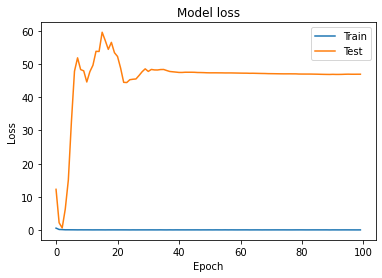

In [93]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [94]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_GOOG)
math.sqrt(mean_squared_error(y_train_GOOG,predict_train))

0.2072815274635623

In [95]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_GOOG)
math.sqrt(mean_squared_error(y_test_GOOG,predict_test))

6.849962788713071

In [96]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_GOOG.shape[1], axis=-1)
y_train_final_GOOG_copies = np.repeat(y_train_GOOG, train_df_GOOG.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_GOOG.shape[1], axis=-1)
y_test_GOOG_copies = np.repeat(y_test_GOOG, train_df_GOOG.shape[1], axis=-1)

In [97]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
train_Y = scaling.inverse_transform(y_train_final_GOOG_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]
test_Y = scaling.inverse_transform(y_test_GOOG_copies)[:,0]

RMSE_GOOG_TRAIN_LSTM = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_GOOG_TRAIN_LSTM)

RMSE_GOOG_TEST_LSTM = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_GOOG_TEST_LSTM)

RMSE for train data
42.33303413125854
RMSE for test data
1398.9655365092515


In [98]:
#Mean absolute percentage error on test data

MAPE_GOOG_TEST_LSTM = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_GOOG_TEST_LSTM)

47.14231205092904


### Comparing actual and predicted stock price

In [99]:
# Assigning index to predicted test data

Predict_GOOG = pd.DataFrame(index=test_df_GOOG[14:].index)#since historical time steps are 10 and prediction in future is 5 so 10+5-1 = 14
Predict_GOOG['Predictions'] = test_Predict

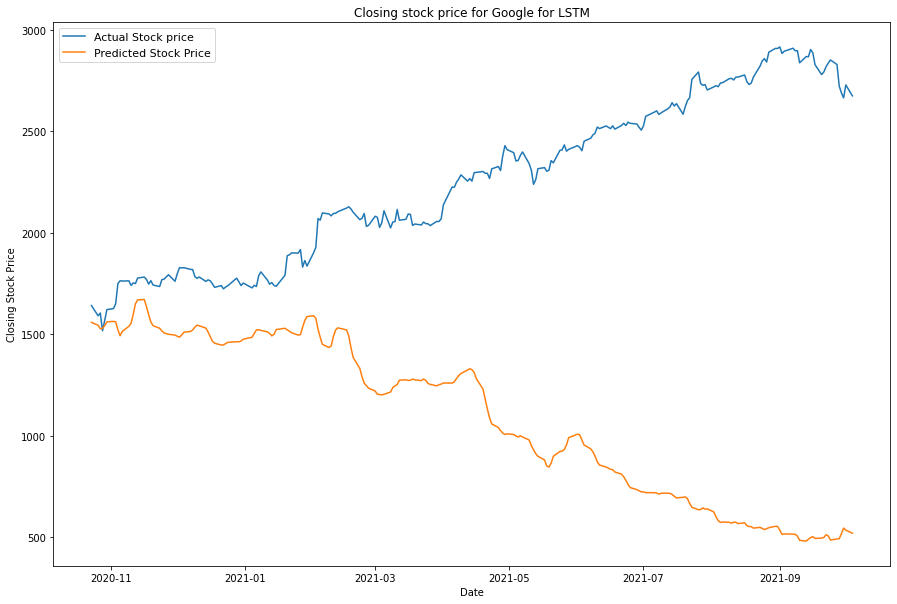

In [100]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for LSTM")
plt.plot(test_df_GOOG[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

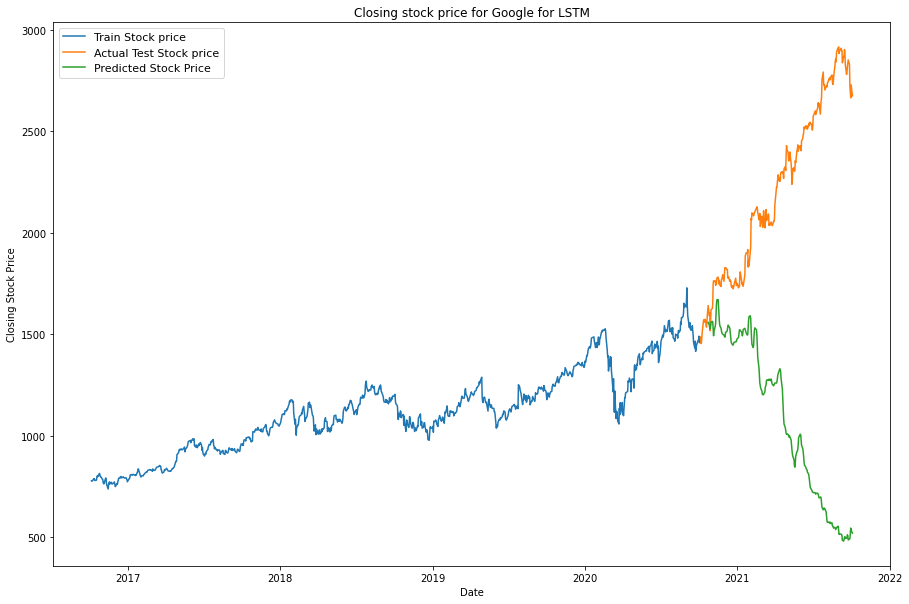

In [101]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for LSTM")
plt.plot(train_df_GOOG['Close'], label ="Train Stock price")
plt.plot(test_df_GOOG['Close'], label ="Actual Test Stock price")
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### GRU Model Development

In [102]:
# Initializing the Neural Network based on GRU model
model = Sequential()

# 1st GRU layer
model.add(GRU(units=64, activation='relu',return_sequences=True, input_shape=(X_train_GOOG.shape[1], X_train_GOOG.shape[2])))

# 2nd GRU layer
model.add(GRU(units=32, activation='relu', return_sequences=False))

# Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 64)            13632     
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 23,073
Trainable params: 23,073
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters

In [103]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_GOOG,y_train_GOOG,validation_data=(X_test_GOOG,y_test_GOOG),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 4s 74ms/step - loss: 0.4740 - val_loss: 4.7609

Epoch 00001: val_loss improved from inf to 4.76094, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 19ms/step - loss: 0.1114 - val_loss: 0.5064

Epoch 00002: val_loss improved from 4.76094 to 0.50645, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0817 - val_loss: 1.0245

Epoch 00003: val_loss did not improve from 0.50645
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.0819 - val_loss: 0.3114

Epoch 00004: val_loss improved from 0.50645 to 0.31145, saving model to weights_new.h5
Epoch 5/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0751 - val_loss: 0.6046

Epoch 00005: val_loss did not improve from 0.31145
Epoch 6/100
16/16 [==============================] - 0s 19ms/step - loss: 0.0771 - val_loss: 0.8369

Epoch 00006: val_loss did not impro

16/16 [==============================] - 0s 18ms/step - loss: 0.0585 - val_loss: 1.7060

Epoch 00052: val_loss did not improve from 0.31145
Epoch 53/100
16/16 [==============================] - 0s 18ms/step - loss: 0.0587 - val_loss: 1.7116

Epoch 00053: val_loss did not improve from 0.31145
Epoch 54/100
16/16 [==============================] - 0s 18ms/step - loss: 0.0639 - val_loss: 1.7127

Epoch 00054: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00054: val_loss did not improve from 0.31145
Epoch 55/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0588 - val_loss: 1.7128

Epoch 00055: val_loss did not improve from 0.31145
Epoch 56/100
16/16 [==============================] - 0s 21ms/step - loss: 0.0655 - val_loss: 1.7125

Epoch 00056: val_loss did not improve from 0.31145
Epoch 57/100
16/16 [==============================] - 0s 20ms/step - loss: 0.0598 - val_loss: 1.7147

Epoch 00057: val_loss did not improve from 0.31145
Epoch 58/100
16/16 [==========

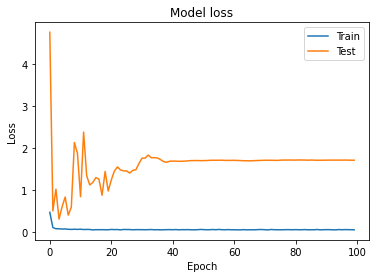

In [104]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [105]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_GOOG)
math.sqrt(mean_squared_error(y_train_GOOG,predict_train))

0.19618271434838297

In [106]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_GOOG)
math.sqrt(mean_squared_error(y_test_GOOG,predict_test))

1.3092172288824766

In [107]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_GOOG.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_GOOG.shape[1], axis=-1)

In [108]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_GOOG_TRAIN_GRU = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_GOOG_TRAIN_GRU)

RMSE_GOOG_TEST_GRU = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_GOOG_TEST_GRU)

RMSE for train data
40.06632964418538
RMSE for test data
267.38101103741997


In [109]:
#Mean absolute percentage error on test data

MAPE_GOOG_TEST_GRU = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_GOOG_TEST_GRU)

9.76491651297162


### Comparing actual and predicted stock price

In [110]:
# Assigning index to predicted test data

Predict_GOOG['Predictions'] = test_Predict
Predict_GOOG

,Predictions
Date,
2020-10-23,1547.283936
2020-10-26,1519.002075
2020-10-27,1520.629517
2020-10-28,1564.236328
2020-10-29,1582.012817
...,...
2021-09-28,2397.615967
2021-09-29,2425.181152
2021-09-30,2452.974854


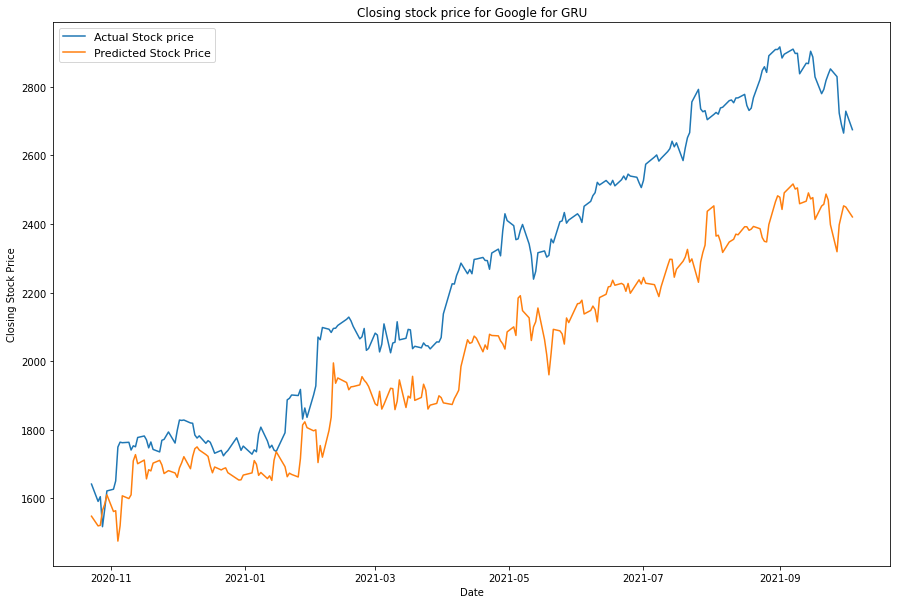

In [111]:
#plotting test actual and predicted stock price for Company Google

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for GRU")
plt.plot(test_df_GOOG[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

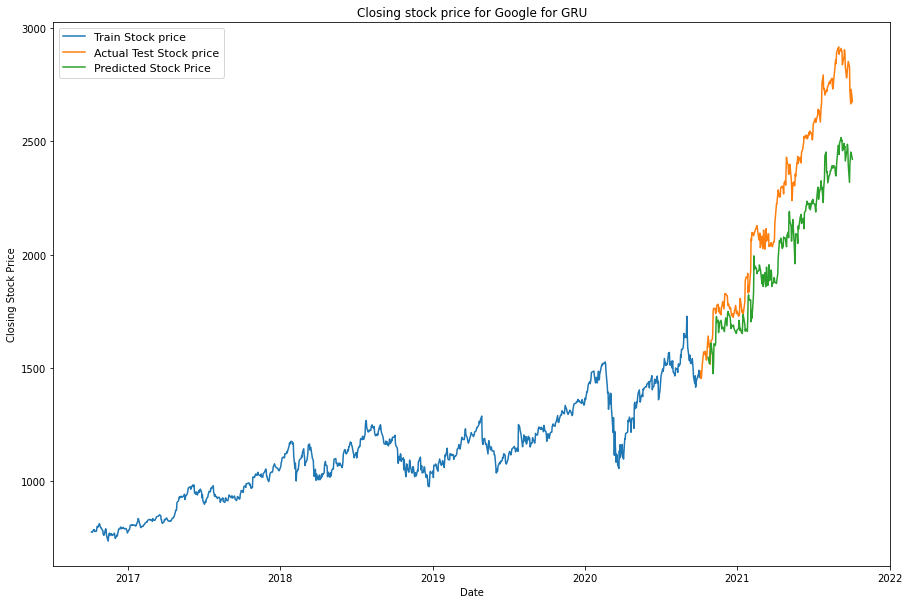

In [112]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for GRU")
plt.plot(train_df_GOOG['Close'], label ="Train Stock price")
plt.plot(test_df_GOOG['Close'], label ="Actual Test Stock price")
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### CNN Model Development

In [113]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_GOOG.shape[1], X_train_GOOG.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 9, 64)             704       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 13,605
Trainable params: 13,605
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters

In [114]:
#Model Training with RMSprop optimizer on entire training data as with RMSprop optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_GOOG,y_train_GOOG,validation_data=(X_test_GOOG,y_test_GOOG),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 1s 11ms/step - loss: 0.1348 - val_loss: 2.3365

Epoch 00001: val_loss improved from inf to 2.33646, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0749 - val_loss: 0.6212

Epoch 00002: val_loss improved from 2.33646 to 0.62123, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0710 - val_loss: 0.1696

Epoch 00003: val_loss improved from 0.62123 to 0.16964, saving model to weights_new.h5
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 0.0646 - val_loss: 1.7603

Epoch 00004: val_loss did not improve from 0.16964
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0682 - val_loss: 2.1255

Epoch 00005: val_loss did not improve from 0.16964
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0645 - val_loss: 0.1880

Epoch 00006: val_loss did not improve f

16/16 [==============================] - 0s 5ms/step - loss: 0.0397 - val_loss: 0.2507

Epoch 00052: val_loss did not improve from 0.14112
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.2509

Epoch 00053: val_loss did not improve from 0.14112
Epoch 54/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.2519

Epoch 00054: val_loss did not improve from 0.14112
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0397 - val_loss: 0.2512

Epoch 00055: val_loss did not improve from 0.14112
Epoch 56/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0396 - val_loss: 0.2519

Epoch 00056: val_loss did not improve from 0.14112
Epoch 57/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.2518

Epoch 00057: val_loss did not improve from 0.14112
Epoch 58/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.2530



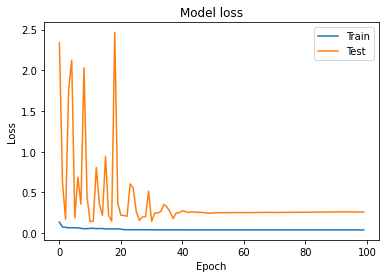

In [115]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [116]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_GOOG)
math.sqrt(mean_squared_error(y_train_GOOG,predict_train))

0.19900663464192803

In [117]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_GOOG)
math.sqrt(mean_squared_error(y_test_GOOG,predict_test))

0.5103664629028506

In [118]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_GOOG.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_GOOG.shape[1], axis=-1)

In [119]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_GOOG_TRAIN_CNN = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_GOOG_TRAIN_CNN)

RMSE_GOOG_TEST_CNN = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_GOOG_TEST_CNN)

RMSE for train data
40.643054547861034
RMSE for test data
104.23199643544686


In [120]:
#Mean absolute percentage error on test data

MAPE_GOOG_TEST_CNN = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_GOOG_TEST_CNN)

3.5736770342875155


### Comparing actual and predicted stock price

In [121]:
# Assigning index to predicted test data

Predict_GOOG['Predictions'] = test_Predict
Predict_GOOG

,Predictions
Date,
2020-10-23,1558.673950
2020-10-26,1557.077026
2020-10-27,1544.845947
2020-10-28,1542.229614
2020-10-29,1582.718018
...,...
2021-09-28,2719.176514
2021-09-29,2692.913086
2021-09-30,2735.011719


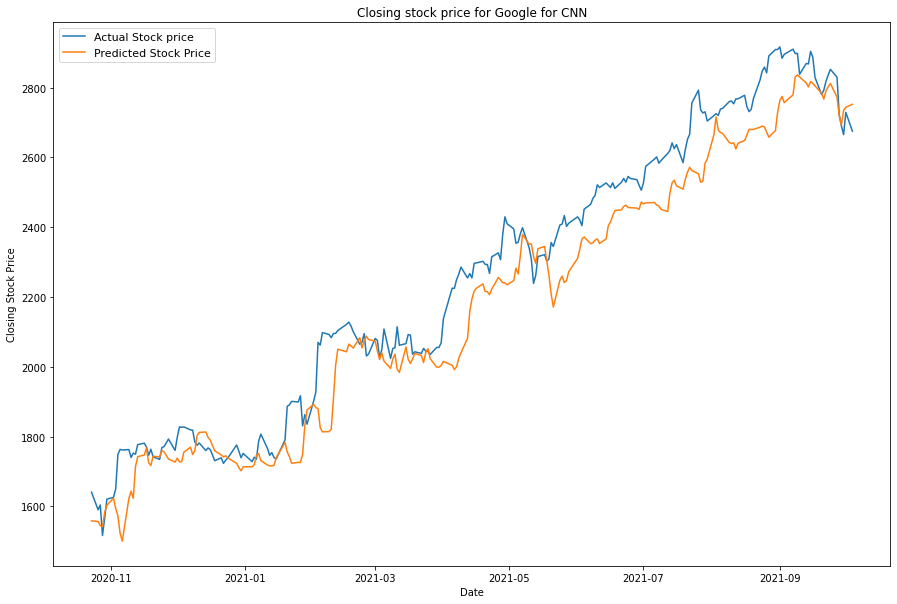

In [122]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for CNN")
plt.plot(test_df_GOOG[14:]['Close'], label ="Actual Stock price")#Plotting after 14 days to match index with predicted data
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

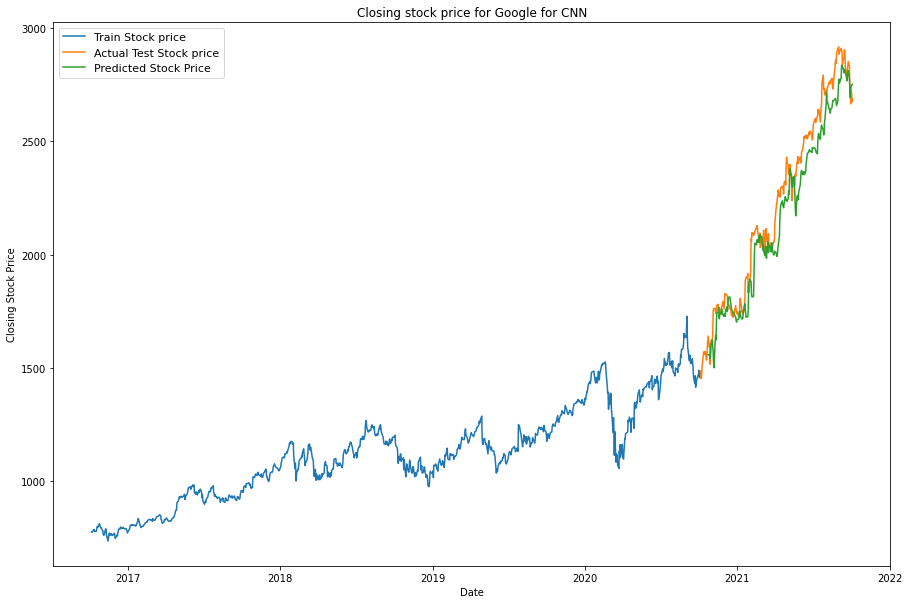

In [123]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for CNN")
plt.plot(train_df_GOOG['Close'], label ="Train Stock price")
plt.plot(test_df_GOOG['Close'], label ="Actual Test Stock price")
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### MLP Model Development

In [124]:
# flatten input dimensions of train data to pass into the MLP model  
ninput = X_train_GOOG.shape[1] * X_train_GOOG.shape[2]
X_train_GOOG_new = X_train_GOOG.reshape((X_train_GOOG.shape[0], ninput))

print("Old shape")
print(X_train_GOOG.shape)

print("New shape")
print(X_train_GOOG_new.shape)

Old shape
(992, 10, 5)
New shape
(992, 50)


In [125]:
#Setup MLP Model

model = Sequential()
model.add(Dense(units = 128, activation='relu', input_dim=ninput))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='linear'))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


### Model Training on entire training dataset with best parameters

In [126]:
# flatten input of test set
n_input_test = X_test_GOOG.shape[1] * X_test_GOOG.shape[2]
X_test_GOOG_new = X_test_GOOG.reshape((X_test_GOOG.shape[0], n_input_test))

# print dimensions
print(X_test_GOOG_new.shape)

(238, 50)


In [127]:
#Model Training with Adam optimizer on entire training data as with adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_GOOG_new,y_train_GOOG,validation_data=(X_test_GOOG_new,y_test_GOOG),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 0.4322 - val_loss: 8.6696

Epoch 00001: val_loss improved from inf to 8.66964, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1502 - val_loss: 2.6967

Epoch 00002: val_loss improved from 8.66964 to 2.69670, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1234 - val_loss: 0.5395

Epoch 00003: val_loss improved from 2.69670 to 0.53947, saving model to weights_new.h5
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0989 - val_loss: 0.2090

Epoch 00004: val_loss improved from 0.53947 to 0.20898, saving model to weights_new.h5
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0881 - val_loss: 0.7212

Epoch 00005: val_loss did not improve from 0.20898
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 0.5500

Epoc

16/16 [==============================] - 0s 4ms/step - loss: 0.0549 - val_loss: 0.4867

Epoch 00052: val_loss did not improve from 0.13046
Epoch 53/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0549 - val_loss: 0.4638

Epoch 00053: val_loss did not improve from 0.13046
Epoch 54/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0490 - val_loss: 0.4486

Epoch 00054: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00054: val_loss did not improve from 0.13046
Epoch 55/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0531 - val_loss: 0.4510

Epoch 00055: val_loss did not improve from 0.13046
Epoch 56/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0562 - val_loss: 0.4550

Epoch 00056: val_loss did not improve from 0.13046
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0535 - val_loss: 0.4608

Epoch 00057: val_loss did not improve from 0.13046
Epoch 58/100
16/16 

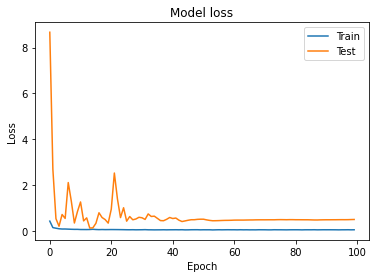

In [128]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [129]:
### Calculate RMSE performance metrics for train data
predict_train=model.predict(X_train_GOOG_new)
math.sqrt(mean_squared_error(y_train_GOOG,predict_train))


0.2068510696629595

In [130]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_GOOG_new)
math.sqrt(mean_squared_error(y_test_GOOG,predict_test))

0.7100152886932262

In [131]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_GOOG.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_GOOG.shape[1], axis=-1)

In [132]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_GOOG_TRAIN_MLP = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_GOOG_TRAIN_MLP)

RMSE_GOOG_TEST_MLP = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_GOOG_TEST_MLP)

RMSE for train data
42.24512162422805
RMSE for test data
145.00620608861712


In [133]:
#Mean absolute percentage error on test data

MAPE_GOOG_TEST_MLP = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_GOOG_TEST_MLP)

5.381994148402234


### Comparing actual and predicted stock price

In [134]:
# Asigning predicted values to dataframe

Predict_GOOG['Predictions'] = test_Predict
Predict_GOOG

,Predictions
Date,
2020-10-23,1534.679932
2020-10-26,1520.736328
2020-10-27,1518.807373
2020-10-28,1544.619385
2020-10-29,1565.777100
...,...
2021-09-28,2636.585205
2021-09-29,2656.158691
2021-09-30,2675.778809


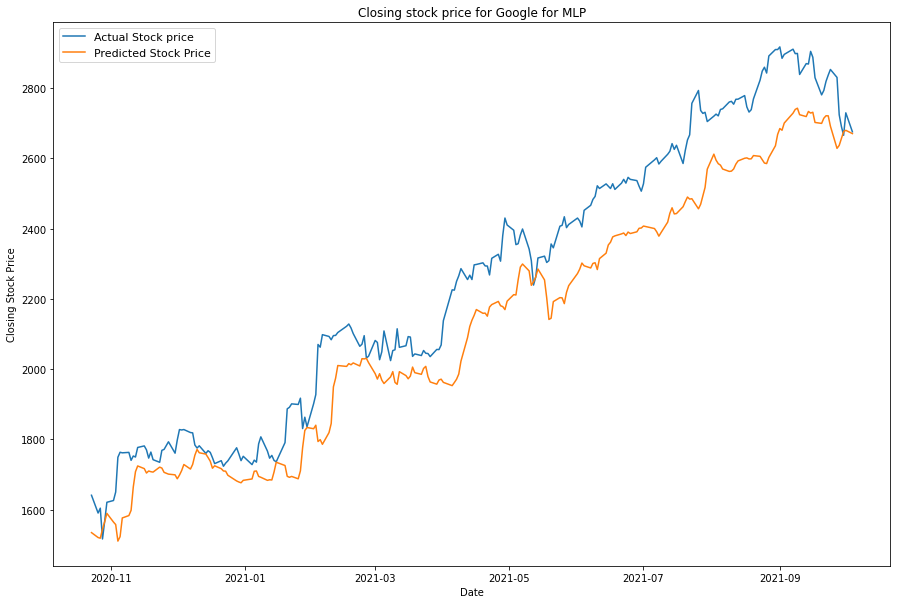

In [135]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for MLP")
plt.plot(test_df_GOOG[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

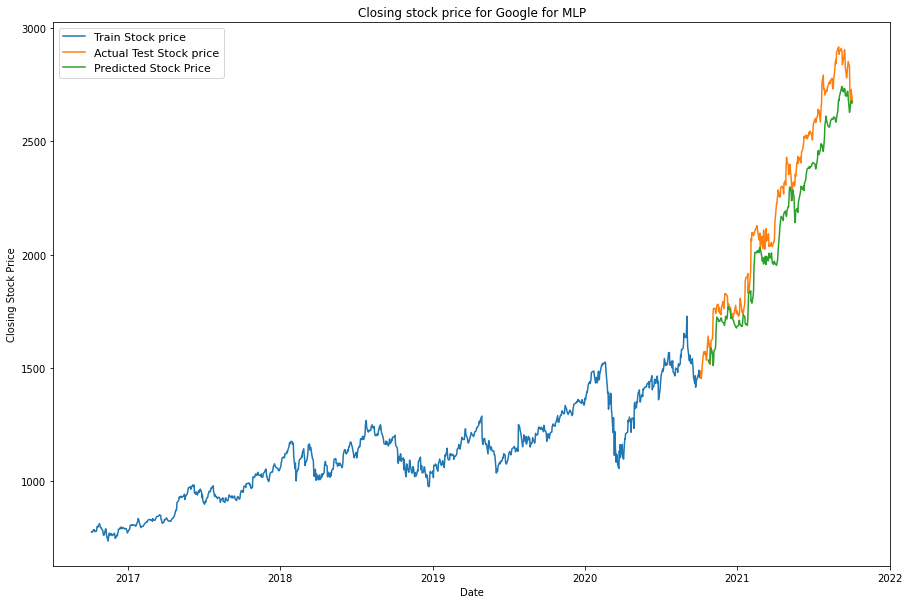

In [136]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for Google for MLP")
plt.plot(train_df_GOOG['Close'], label ="Train Stock price")
plt.plot(test_df_GOOG['Close'], label ="Actual Test Stock price")
plt.plot(Predict_GOOG['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

  Model         RMSE       MAPE
0  LSTM  1398.965537  47.142312
1   GRU   267.381011   9.764917
2   CNN   104.231996   3.573677
3   MLP   145.006206   5.381994


<Figure size 864x720 with 0 Axes>

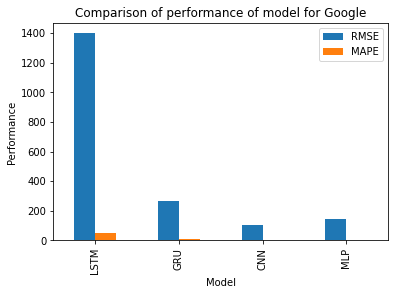

In [137]:
#Comparing the models performance with graphical visualisations

data = [['LSTM', RMSE_GOOG_TEST_LSTM, MAPE_GOOG_TEST_LSTM], ['GRU', RMSE_GOOG_TEST_GRU, MAPE_GOOG_TEST_GRU],\
       ['CNN', RMSE_GOOG_TEST_CNN, MAPE_GOOG_TEST_CNN], ['MLP', RMSE_GOOG_TEST_MLP, MAPE_GOOG_TEST_MLP]]
df_model = pd.DataFrame(data, columns = ['Model', 'RMSE', 'MAPE'])
print(df_model)

plt.figure(figsize=(12,10))
df_model.plot( kind='bar',x= 'Model', y=['RMSE', 'MAPE'], title='Comparison of performance of model for Google')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

plt.legend(loc= "best")

#Show plot
plt.show()

## Closing Stock Price Forecasting for IBM

### Data Splitting

In [138]:
#Removing volume as this column will not be used for model training

cols = list(df_IBM)[0:5]
df_IBM_new = df_IBM[cols]
df_IBM_new

,Open,High,Low,Close,Adj Close
Date,,,,,
2016-10-05,150.162521,150.889099,149.827911,150.172089,119.900604
2016-10-06,149.942642,150.506699,149.034424,149.980881,119.747948
2016-10-07,150.229446,150.764816,148.049713,148.824097,118.824341
2016-10-10,149.818359,151.520081,149.770554,150.114716,119.854782
2016-10-11,149.837479,150.047806,147.122375,147.982788,118.152596
...,...,...,...,...,...
2021-09-28,133.049713,133.546844,131.175903,131.424469,131.424469
2021-09-29,131.673035,133.776291,130.439774,133.059280,133.059280
2021-09-30,133.843216,134.388138,132.409180,132.820267,132.820267


In [139]:
#Splitting the data into train, validation and test set

x = len(df_IBM_new)
train_df_IBM = df_IBM_new[0:int(x*0.8)]
test_df_IBM = df_IBM_new[int(x*0.8):]

print(train_df_IBM.shape)
print(test_df_IBM.shape)

(1006, 5)
(252, 5)


### Data Preprocessing

In [140]:
#Standardising the datasets

scaling = StandardScaler()
scaling.fit(train_df_IBM)
train_df_IBM_scaled = scaling.transform(train_df_IBM)
test_df_IBM_scaled = scaling.transform(test_df_IBM)

print("Scaled train data")
print(train_df_IBM_scaled)
print("Scaled Test data")
print(test_df_IBM_scaled)

Scaled train data
[[ 0.87231161  0.86369917  0.9109509   0.87643941  0.1714327 ]
 [ 0.85796174  0.83841215  0.85979401  0.86395034  0.15497724]
 [ 0.87667932  0.85548069  0.79630871  0.78839311  0.0554176 ]
 ...
 [-1.35447828 -1.34391005 -1.30300479 -1.33470992 -0.82885535]
 [-1.29333387 -1.31925468 -1.33012432 -1.3709278  -0.8856992 ]
 [-1.50047714 -1.41724465 -1.4250438  -1.40339872 -0.93666212]]
Scaled Test data
[[-1.325778   -1.35402552 -1.28759583 -1.31347921 -0.79553395]
 [-1.27960738 -1.22252952 -1.25431269 -1.31597685 -0.79945357]
 [-1.27399192 -1.25034617 -1.20931845 -1.18484372 -0.59364241]
 ...
 [-0.19272886 -0.22746217 -0.21205195 -0.25692317  1.5640997 ]
 [-0.13033624 -0.0125167  -0.09679297  0.01720714  2.01650677]
 [-0.02177397  0.11581756  0.02524507  0.06653746  2.09791836]]


In [141]:
# reshape data into X=d,d+1,d+2,d+3....t+14 and Y=d+14+1
n_steps = 10  # Number of past days to be used to predict the future
future_n = 5 # Predict price after 1 day into the future

X_train_IBM, y_train_IBM = data_prepare(train_df_IBM_scaled, n_steps, future_n)
X_test_IBM, y_test_IBM = data_prepare(test_df_IBM_scaled, n_steps, future_n)

In [142]:
print('X_train_IBM shape == {}.'.format(X_train_IBM.shape))
print('y_train_IBM shape == {}.'.format(y_train_IBM.shape))

print('X_test_IBM shape == {}.'.format(X_test_IBM.shape))
print('y_test_IBM shape == {}.'.format(y_test_IBM.shape))

X_train_IBM shape == (992, 10, 5).
y_train_IBM shape == (992, 1).
X_test_IBM shape == (238, 10, 5).
y_test_IBM shape == (238, 1).


### LSTM Model Development

In [143]:
# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=64, return_sequences=True, activation='relu', input_shape=(X_train_IBM.shape[1], X_train_IBM.shape[2])))

# Adding 2nd LSTM layer
model.add(LSTM(units=32, activation='relu', return_sequences=False))

# Adding Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 64)            17920     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 30,369
Trainable params: 30,369
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters

In [144]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_IBM,y_train_IBM,validation_data=(X_test_IBM,y_test_IBM),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 3s 35ms/step - loss: 0.6167 - val_loss: 0.3346

Epoch 00001: val_loss improved from inf to 0.33465, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 0.2745 - val_loss: 0.1970

Epoch 00002: val_loss improved from 0.33465 to 0.19704, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.2186 - val_loss: 0.1091

Epoch 00003: val_loss improved from 0.19704 to 0.10911, saving model to weights_new.h5
Epoch 4/100
16/16 [==============================] - 0s 14ms/step - loss: 0.1740 - val_loss: 0.1373

Epoch 00004: val_loss did not improve from 0.10911
Epoch 5/100
16/16 [==============================] - 0s 17ms/step - loss: 0.1494 - val_loss: 0.2903

Epoch 00005: val_loss did not improve from 0.10911
Epoch 6/100
16/16 [==============================] - 1s 45ms/step - loss: 0.1434 - val_loss: 0.2568

Epoch 00006: val_loss did not impro

16/16 [==============================] - 0s 18ms/step - loss: 0.0939 - val_loss: 0.1959

Epoch 00052: val_loss did not improve from 0.10911
Epoch 53/100
16/16 [==============================] - 0s 28ms/step - loss: 0.0949 - val_loss: 0.1960

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00053: val_loss did not improve from 0.10911
Epoch 54/100
16/16 [==============================] - 1s 48ms/step - loss: 0.0982 - val_loss: 0.1964

Epoch 00054: val_loss did not improve from 0.10911
Epoch 55/100
16/16 [==============================] - 1s 39ms/step - loss: 0.0957 - val_loss: 0.1964

Epoch 00055: val_loss did not improve from 0.10911
Epoch 56/100
16/16 [==============================] - 1s 44ms/step - loss: 0.0999 - val_loss: 0.1963

Epoch 00056: val_loss did not improve from 0.10911
Epoch 57/100
16/16 [==============================] - 0s 17ms/step - loss: 0.0974 - val_loss: 0.1962

Epoch 00057: val_loss did not improve from 0.10911
Epoch 58/100
16/16 [==========

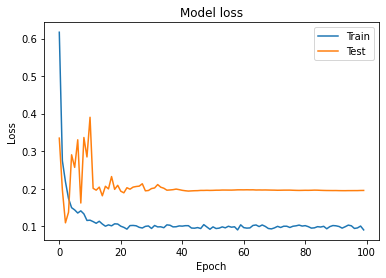

In [145]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [146]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_IBM)
math.sqrt(mean_squared_error(y_train_IBM,predict_train))

0.2680069252283601

In [147]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_IBM)
math.sqrt(mean_squared_error(y_test_IBM,predict_test))

0.4419634091954031

In [148]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_IBM.shape[1], axis=-1)
y_train_final_IBM_copies = np.repeat(y_train_IBM, train_df_IBM.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_IBM.shape[1], axis=-1)
y_test_IBM_copies = np.repeat(y_test_IBM, train_df_IBM.shape[1], axis=-1)

In [149]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
train_Y = scaling.inverse_transform(y_train_final_IBM_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]
test_Y = scaling.inverse_transform(y_test_IBM_copies)[:,0]

RMSE_IBM_TRAIN_LSTM = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_IBM_TRAIN_LSTM)

RMSE_IBM_TEST_LSTM = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_IBM_TEST_LSTM)

RMSE for train data
4.1065921386334425
RMSE for test data
6.772076334891048


In [150]:
#Mean absolute percentage error on test data

MAPE_IBM_TEST_LSTM = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_IBM_TEST_LSTM)

4.033608526355787


### Comparing actual and predicted stock price

In [151]:
# Assigning index to predicted test data

Predict_IBM = pd.DataFrame(index=test_df_IBM[14:].index)#since historical time steps are 10 and prediction in future is 5 so 10+5-1 = 14
Predict_IBM['Predictions'] = test_Predict

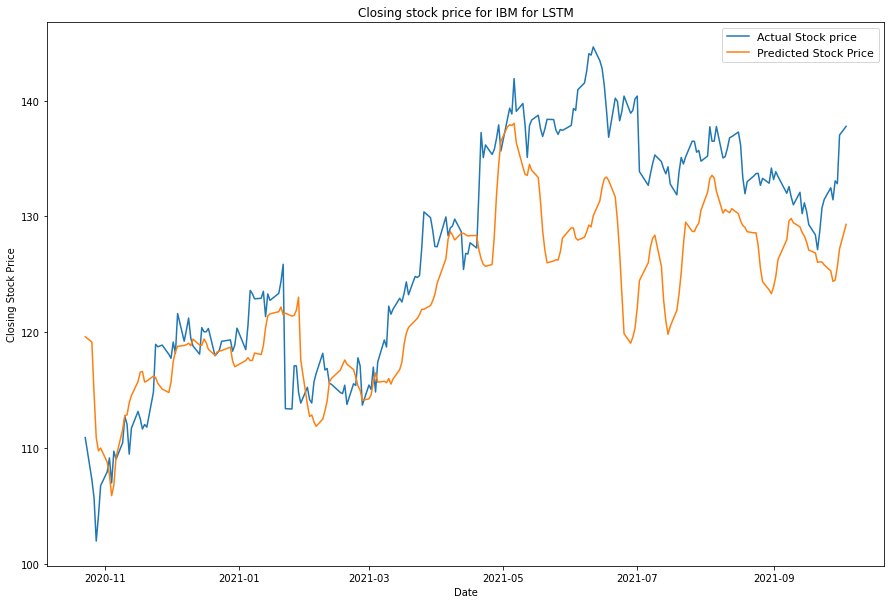

In [152]:
#plotting test actual and predicted stock price for Company IBM

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for LSTM")
plt.plot(test_df_IBM[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

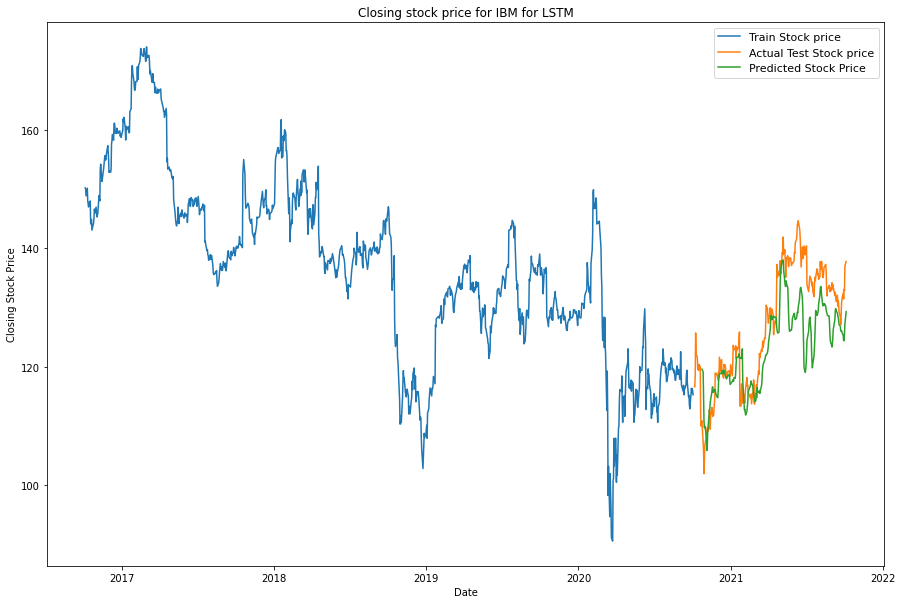

In [153]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for LSTM")
plt.plot(train_df_IBM['Close'], label ="Train Stock price")
plt.plot(test_df_IBM['Close'], label ="Actual Test Stock price")
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### GRU Model Development

In [154]:
# Initializing the Neural Network based on GRU model
model = Sequential()

# 1st GRU layer
model.add(GRU(units=64, activation='relu',return_sequences=True, input_shape=(X_train_IBM.shape[1], X_train_IBM.shape[2])))

# 2nd GRU layer
model.add(GRU(units=32, activation='relu', return_sequences=False))

# Dropout
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compiling the Neural Network
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 10, 64)            13632     
_________________________________________________________________
gru_5 (GRU)                  (None, 32)                9408      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 23,073
Trainable params: 23,073
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters

In [155]:
#Model Training with Adam optimizer on entire training data as with Adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_IBM,y_train_IBM,validation_data=(X_test_IBM,y_test_IBM),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 5s 78ms/step - loss: 0.5752 - val_loss: 0.0886

Epoch 00001: val_loss improved from inf to 0.08861, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1834 - val_loss: 0.0877

Epoch 00002: val_loss improved from 0.08861 to 0.08773, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 20ms/step - loss: 0.1492 - val_loss: 0.0616

Epoch 00003: val_loss improved from 0.08773 to 0.06158, saving model to weights_new.h5
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.1457 - val_loss: 0.0639

Epoch 00004: val_loss did not improve from 0.06158
Epoch 5/100
16/16 [==============================] - 0s 27ms/step - loss: 0.1292 - val_loss: 0.0762

Epoch 00005: val_loss did not improve from 0.06158
Epoch 6/100
16/16 [==============================] - 0s 30ms/step - loss: 0.1252 - val_loss: 0.0718

Epoch 00006: val_loss did not impro

16/16 [==============================] - 0s 17ms/step - loss: 0.0980 - val_loss: 0.1193

Epoch 00052: val_loss did not improve from 0.06158
Epoch 53/100
16/16 [==============================] - 0s 23ms/step - loss: 0.0928 - val_loss: 0.1194

Epoch 00053: ReduceLROnPlateau reducing learning rate to 1e-06.

Epoch 00053: val_loss did not improve from 0.06158
Epoch 54/100
16/16 [==============================] - 0s 24ms/step - loss: 0.0943 - val_loss: 0.1195

Epoch 00054: val_loss did not improve from 0.06158
Epoch 55/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1007 - val_loss: 0.1194

Epoch 00055: val_loss did not improve from 0.06158
Epoch 56/100
16/16 [==============================] - 0s 16ms/step - loss: 0.1046 - val_loss: 0.1194

Epoch 00056: val_loss did not improve from 0.06158
Epoch 57/100
16/16 [==============================] - 0s 19ms/step - loss: 0.1094 - val_loss: 0.1194

Epoch 00057: val_loss did not improve from 0.06158
Epoch 58/100
16/16 [==========

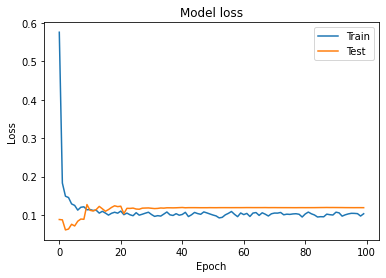

In [156]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [157]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_IBM)
math.sqrt(mean_squared_error(y_train_IBM,predict_train))

0.2744175800941681

In [158]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_IBM)
math.sqrt(mean_squared_error(y_test_IBM,predict_test))

0.3455051034840319

In [159]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_IBM.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_IBM.shape[1], axis=-1)

In [160]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_IBM_TRAIN_GRU = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_IBM_TRAIN_GRU)

RMSE_IBM_TEST_GRU = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_IBM_TEST_GRU)

RMSE for train data
4.2048207043098715
RMSE for test data
5.294074151722693


In [161]:
#Mean absolute percentage error on test data

MAPE_IBM_TEST_GRU = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_IBM_TEST_GRU)

3.1785860063466016


### Comparing actual and predicted stock price

In [162]:
# Assigning index to predicted test data

Predict_IBM['Predictions'] = test_Predict
Predict_IBM

,Predictions
Date,
2020-10-23,119.586090
2020-10-26,120.027695
2020-10-27,114.717842
2020-10-28,111.580772
2020-10-29,110.819435
...,...
2021-09-28,126.561035
2021-09-29,126.882195
2021-09-30,128.431610


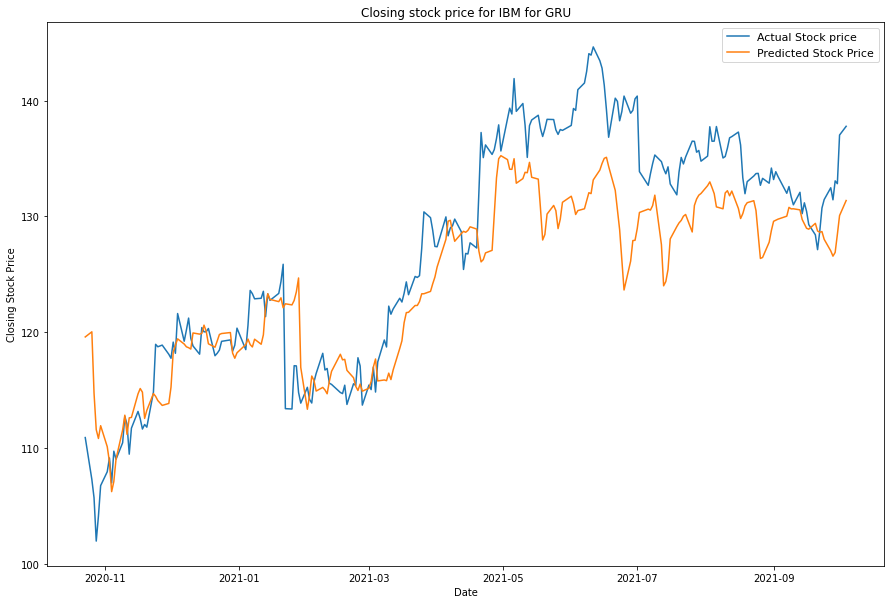

In [163]:
#plotting test actual and predicted stock price for Company IBM

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for GRU")
plt.plot(test_df_IBM[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

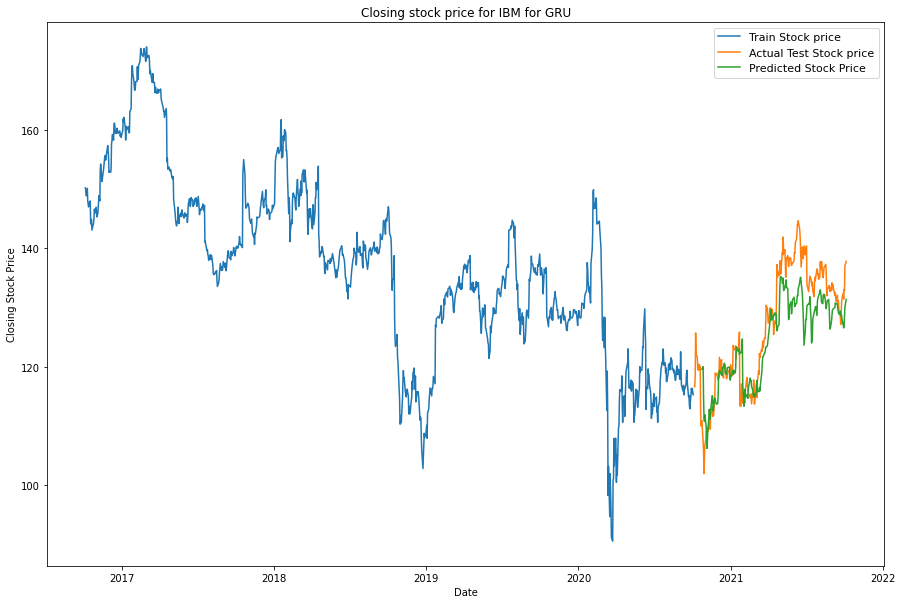

In [164]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for GRU")
plt.plot(train_df_IBM['Close'], label ="Train Stock price")
plt.plot(test_df_IBM['Close'], label ="Actual Test Stock price")
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### CNN Model Development

In [165]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_IBM.shape[1], X_train_IBM.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 9, 64)             704       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                12850     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 13,605
Trainable params: 13,605
Non-trainable params: 0
_________________________________________________________________


### Model training on entire training dataset with best parameters

In [166]:
#Model Training with RMSprop optimizer on entire training data as with RMSprop optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='RMSprop', loss='mean_squared_error')

history = model.fit(X_train_IBM,y_train_IBM,validation_data=(X_test_IBM,y_test_IBM),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 0.2085 - val_loss: 0.0846

Epoch 00001: val_loss improved from inf to 0.08462, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1267 - val_loss: 0.1194

Epoch 00002: val_loss did not improve from 0.08462
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1069 - val_loss: 0.2410

Epoch 00003: val_loss did not improve from 0.08462
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1086 - val_loss: 0.0979

Epoch 00004: val_loss did not improve from 0.08462
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1001 - val_loss: 0.1512

Epoch 00005: val_loss did not improve from 0.08462
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 0.1260

Epoch 00006: val_loss did not improve from 0.08462
Epoch 7/100
16/16 [==============================] - 0s 4ms/s

16/16 [==============================] - 0s 4ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00052: val_loss did not improve from 0.08158
Epoch 53/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00053: val_loss did not improve from 0.08158
Epoch 54/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00054: val_loss did not improve from 0.08158
Epoch 55/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00055: val_loss did not improve from 0.08158
Epoch 56/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00056: val_loss did not improve from 0.08158
Epoch 57/100
16/16 [==============================] - 0s 8ms/step - loss: 0.0658 - val_loss: 0.1114

Epoch 00057: val_loss did not improve from 0.08158
Epoch 58/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0658 - val_loss: 0.1114



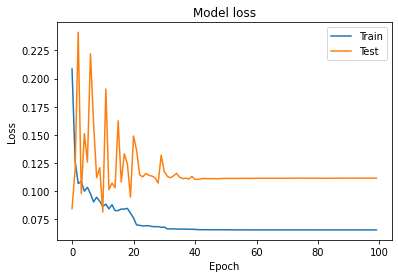

In [167]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [168]:
### Calculate RMSE performance metrics for train data

predict_train=model.predict(X_train_IBM)
math.sqrt(mean_squared_error(y_train_IBM,predict_train))

0.2563362903134261

In [169]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_IBM)
math.sqrt(mean_squared_error(y_test_IBM,predict_test))

0.33417895324740043

In [170]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_IBM.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_IBM.shape[1], axis=-1)

In [171]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_IBM_TRAIN_CNN = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_IBM_TRAIN_CNN)

RMSE_IBM_TEST_CNN = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_IBM_TEST_CNN)

RMSE for train data
3.927766294737763
RMSE for test data
5.120526879860811


In [172]:
#Mean absolute percentage error on test data

MAPE_IBM_TEST_CNN = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_IBM_TEST_CNN)

3.216625242963179


### Comparing actual and predicted speed for all sensors

In [173]:
# Assigning index to predicted test data

Predict_IBM['Predictions'] = test_Predict
Predict_IBM

,Predictions
Date,
2020-10-23,119.480003
2020-10-26,118.499481
2020-10-27,119.952316
2020-10-28,112.712486
2020-10-29,109.353569
...,...
2021-09-28,131.009827
2021-09-29,130.473892
2021-09-30,130.228653


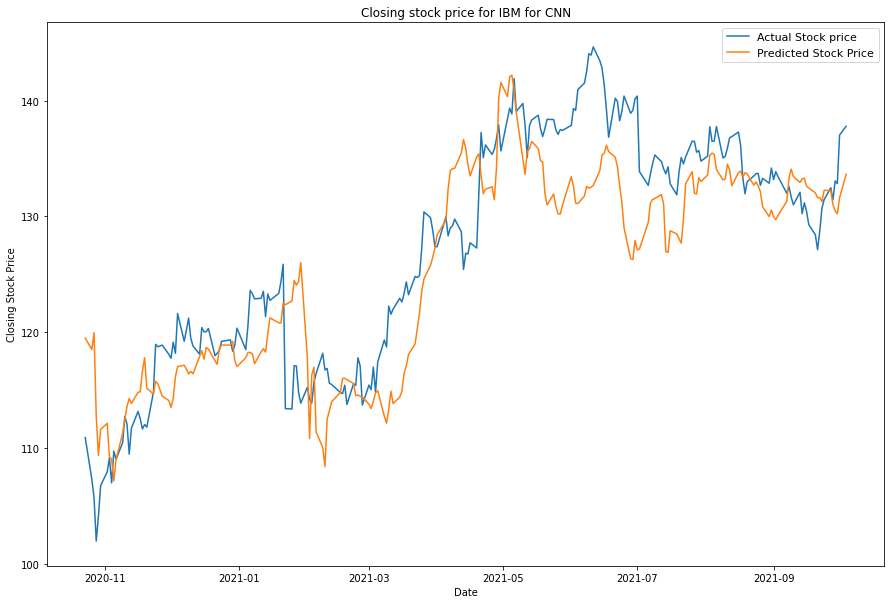

In [174]:
#plotting test actual and predicted stock price for Company Apple

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for CNN")
plt.plot(test_df_IBM[14:]['Close'], label ="Actual Stock price")#Plotting after 14 days to match index with predicted data
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

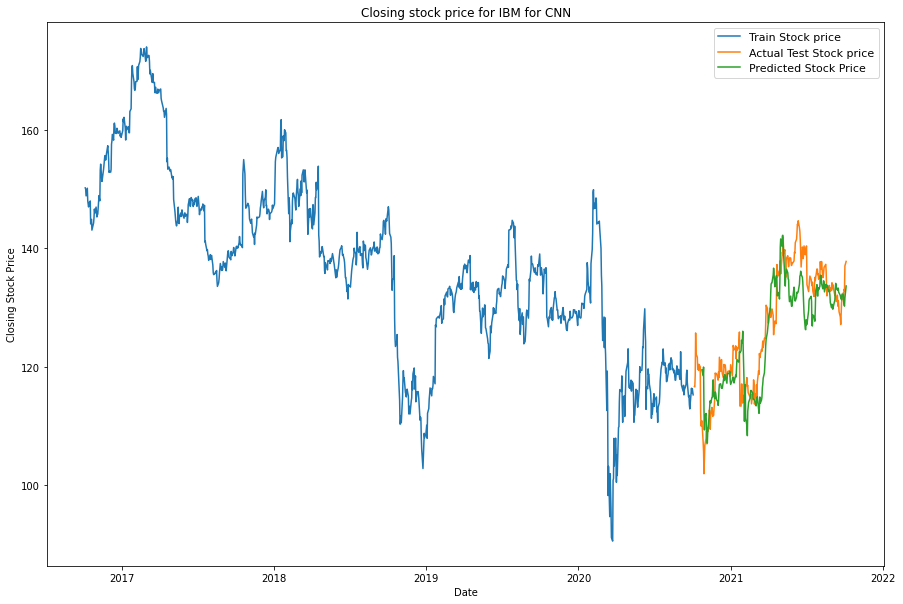

In [175]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for CNN")
plt.plot(train_df_IBM['Close'], label ="Train Stock price")
plt.plot(test_df_IBM['Close'], label ="Actual Test Stock price")
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

### MLP Model Development

In [176]:
# flatten input dimensions of train data to pass into the MLP model  
ninput = X_train_IBM.shape[1] * X_train_IBM.shape[2]
X_train_IBM_new = X_train_IBM.reshape((X_train_IBM.shape[0], ninput))

print("Old shape")
print(X_train_IBM.shape)

print("New shape")
print(X_train_IBM_new.shape)

Old shape
(992, 10, 5)
New shape
(992, 50)


In [177]:
#Setup MLP Model

model = Sequential()
model.add(Dense(units = 128, activation='relu', input_dim=ninput))
model.add(Dropout(0.2))
model.add(Dense(units = 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, activation='linear'))

model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               6528      
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 14,849
Trainable params: 14,849
Non-trainable params: 0
_________________________________________________________________


### Model Training on entire training dataset with best parameters

In [178]:
# flatten input of test set
n_input_test = X_test_IBM.shape[1] * X_test_IBM.shape[2]
X_test_IBM_new = X_test_IBM.reshape((X_test_IBM.shape[0], n_input_test))

# print dimensions
print(X_test_IBM_new.shape)

(238, 50)


In [179]:
#Model Training with Adam optimizer on entire training data as with adam optimizer min validation loss is obtained

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.2, min_lr=0.000001, verbose=1)
modelcheckpoint = ModelCheckpoint(filepath='weights_new.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only=True, save_weights_only=True)

model.compile(optimizer='Adam', loss='mean_squared_error')

history = model.fit(X_train_IBM_new,y_train_IBM,validation_data=(X_test_IBM_new,y_test_IBM),
          epochs=100,batch_size=64,verbose=1, callbacks=[lr_reduce,modelcheckpoint])

Epoch 1/100
16/16 [==============================] - 1s 10ms/step - loss: 0.4032 - val_loss: 0.1326

Epoch 00001: val_loss improved from inf to 0.13263, saving model to weights_new.h5
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1882 - val_loss: 0.1218

Epoch 00002: val_loss improved from 0.13263 to 0.12177, saving model to weights_new.h5
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1511 - val_loss: 0.1380

Epoch 00003: val_loss did not improve from 0.12177
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1278 - val_loss: 0.1428

Epoch 00004: val_loss did not improve from 0.12177
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.1244 - val_loss: 0.1324

Epoch 00005: val_loss did not improve from 0.12177
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.1209 - val_loss: 0.1245

Epoch 00006: val_loss did not improve from 0.12177
Epoch 7/100
16/16 [=====

16/16 [==============================] - 0s 3ms/step - loss: 0.0888 - val_loss: 0.0785

Epoch 00052: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.

Epoch 00052: val_loss did not improve from 0.07443
Epoch 53/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 0.0785

Epoch 00053: val_loss did not improve from 0.07443
Epoch 54/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0865 - val_loss: 0.0785

Epoch 00054: val_loss did not improve from 0.07443
Epoch 55/100
16/16 [==============================] - 0s 7ms/step - loss: 0.0921 - val_loss: 0.0786

Epoch 00055: val_loss did not improve from 0.07443
Epoch 56/100
16/16 [==============================] - 0s 9ms/step - loss: 0.0854 - val_loss: 0.0786

Epoch 00056: val_loss did not improve from 0.07443
Epoch 57/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0816 - val_loss: 0.0786

Epoch 00057: val_loss did not improve from 0.07443
Epoch 58/100
16/16 

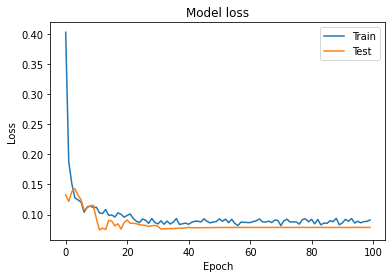

In [180]:
#plotting the loss and val_loss for the model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [181]:
### Calculate RMSE performance metrics for train data
predict_train=model.predict(X_train_IBM_new)
math.sqrt(mean_squared_error(y_train_IBM,predict_train))


0.2653148254558824

In [182]:
### Calculate RMSE performance metrics for test data

predict_test=model.predict(X_test_IBM_new)
math.sqrt(mean_squared_error(y_test_IBM,predict_test))

0.2803352127016432

In [183]:
#Creating same columns as original data before inversing transformations

predict_train_copies = np.repeat(predict_train, train_df_IBM.shape[1], axis=-1)
predict_test_copies = np.repeat(predict_test, train_df_IBM.shape[1], axis=-1)

In [184]:
# invert predictions and actual data and find RMSE

train_Predict = scaling.inverse_transform(predict_train_copies)[:,0]
test_Predict = scaling.inverse_transform(predict_test_copies)[:,0]

RMSE_IBM_TRAIN_MLP = math.sqrt(mean_squared_error(train_Y,train_Predict))
print("RMSE for train data")
print(RMSE_IBM_TRAIN_MLP)

RMSE_IBM_TEST_MLP = math.sqrt(mean_squared_error(test_Y,test_Predict))
print("RMSE for test data")
print(RMSE_IBM_TEST_MLP)

RMSE for train data
4.065341808822548
RMSE for test data
4.29549456299267


In [185]:
#Mean absolute percentage error on test data

MAPE_IBM_TEST_MLP = np.mean((np.abs(np.subtract(test_Y, test_Predict)/ test_Y))) * 100
print(MAPE_IBM_TEST_MLP)

2.616809237684044


### Comparing actual and predicted stock price

In [186]:
# Asigning predicted values to dataframe

Predict_IBM['Predictions'] = test_Predict
Predict_IBM

,Predictions
Date,
2020-10-23,122.453369
2020-10-26,121.985703
2020-10-27,116.009644
2020-10-28,111.944542
2020-10-29,111.742104
...,...
2021-09-28,128.768555
2021-09-29,129.406601
2021-09-30,130.510315


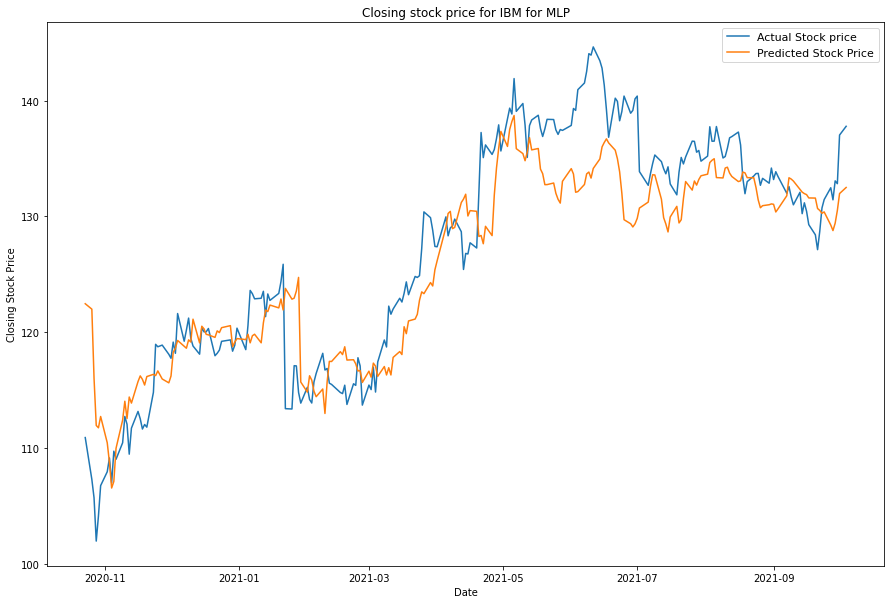

In [187]:
#plotting test actual and predicted stock price for Company IBM

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for MLP")
plt.plot(test_df_IBM[14:]['Close'], label ="Actual Stock price")#plotting after 14 days to match with predicted index
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

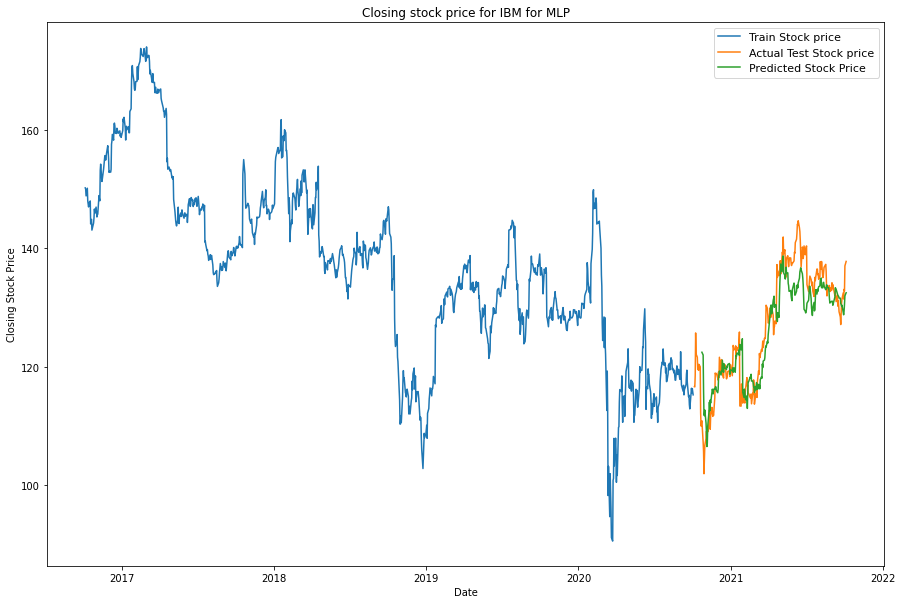

In [188]:
# Visualize actual and predicted stock price along with train data

plt.figure(figsize=(15,10))
plt.title("Closing stock price for IBM for MLP")
plt.plot(train_df_IBM['Close'], label ="Train Stock price")
plt.plot(test_df_IBM['Close'], label ="Actual Test Stock price")
plt.plot(Predict_IBM['Predictions'], label ="Predicted Stock Price")
plt.ylabel("Closing Stock Price")
plt.xlabel("Date")
plt.legend(loc="best", fontsize=11)
plt.show()

  Model      RMSE      MAPE
0  LSTM  6.772076  4.033609
1   GRU  5.294074  3.178586
2   CNN  5.120527  3.216625
3   MLP  4.295495  2.616809


<Figure size 864x720 with 0 Axes>

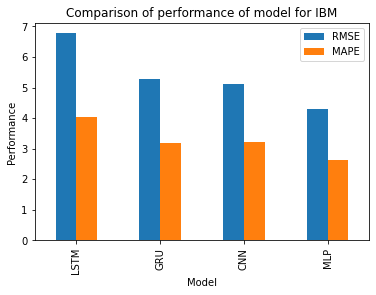

In [189]:
#Comparing the models performance with graphical visualisations

data = [['LSTM', RMSE_IBM_TEST_LSTM, MAPE_IBM_TEST_LSTM], ['GRU', RMSE_IBM_TEST_GRU, MAPE_IBM_TEST_GRU],\
       ['CNN', RMSE_IBM_TEST_CNN, MAPE_IBM_TEST_CNN], ['MLP', RMSE_IBM_TEST_MLP, MAPE_IBM_TEST_MLP]]
df_model = pd.DataFrame(data, columns = ['Model', 'RMSE', 'MAPE'])
print(df_model)

plt.figure(figsize=(12,10))
df_model.plot( kind='bar',x= 'Model', y=['RMSE', 'MAPE'], title='Comparison of performance of model for IBM')

#x-axis label
plt.xlabel("Model")

#y-axis label
plt.ylabel("Performance")

plt.legend(loc='best')

#Show plot
plt.show()